In [637]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [702]:
sADF=pd.read_csv(r"Site A - Tue Feb 15 2022 to Thu Jun 30 2022.csv")
sBDF=pd.read_csv(r"Site B - Tue Feb 15 2022 to Thu Jun 30 2022.csv")

In [1311]:
#sADF.head()
#print(sADF.shape,sBDF.shape)
#print(sADF.columns,sBDF.columns)
#sADF["Timestamp"][0]

In [1312]:
pd.to_datetime(sADF["Timestamp"]);
pd.to_datetime(sBDF["Timestamp"]);

In [1313]:
def IdentifyEvents_3(df,dry_hours_skip,moving_hours):
    #  This method use moving STD (std_mov) (last (moving_hours) hours) for start and end of an event
    # For the start of an event use: std_mov > *8 percent of range of std_mov 
    # To detect the end of an event use: std_mov < 3 percentage of range of std_mov
    skip=int(dry_hours_skip*(60/5))    # (dry_hours_skip) hours of no significant change in water level means start of another event
    #wlc_mm=np.diff(df[" Water Level [m]"])*1000 # water level change measured in mm
    wl_mm=df[" Water Level [m]"].to_numpy()*1000  # water level in mm
    
    ###### this part calculates the moving STD
    std_mov=moving_std(df,moving_hours)      # calculates STD of last (moving_hours) hours
    rng3p=np.max(std_mov)*(3/100)            # 3 percent of the range of moving STD
    rng8p=np.max(std_mov)*(7.5/100)          # 7.5 percent of the range of moving STD
    ########################################
    
    nre=True     #indicator if the current time falls under "No Rain Event" or not
    # rpc=0
    #dpc=0
    start_time=[]
    end_time=[]
    start_index=[]
    end_index=[]
    #duration=[]
    i=1
    while i<df.shape[0]-1:
        if std_mov[i]>=rng8p:
            if nre==True:
                # This is a new rainfall event
                start_time.append(df["Timestamp"][df.index.to_list()[0]+i])
                start_index.append(df.index.to_list()[0]+i)
                nre=False
                i+=1
            while std_mov[i]>rng3p:
                i+=1
            if np.max(std_mov[i+1:i+skip+1])<rng8p:
                # dry period starts from index i+1
                end_time.append(df["Timestamp"][df.index.to_list()[0]+i])
                end_index.append(df.index.to_list()[0]+i)
                nre=True
                i=i+skip
        i+=1

    return start_time,end_time,start_index,end_index,np.subtract(end_index,start_index),wl_mm

In [1282]:
# Calculate moving STD of last *few hours
def moving_std(df,period_in_hour):      
    wl_mm=df[" Water Level [m]"].to_numpy()*1000  # water level in mm
    mov_std=[0]
    mean_mov=[wl_mm[0]]
    for i in range(np.size(wl_mm)):
        periods=int(period_in_hour*(60/5))    
        if i<periods:
            mov_std.append(np.std(wl_mm[:i+1]))
            mean_mov.append(np.mean(wl_mm[:i+1]))
        else:
            mov_std.append(np.std(wl_mm[i-periods:i+1]))
            mean_mov.append(np.mean(wl_mm[i-periods:i+1]))
    return mov_std
#Calculate moving MEAN of last *few hours
def moving_mean(df,period_in_hour):
    wl_mm=df[" Water Level [m]"].to_numpy()*1000  # water level in mm
    mean_mov=[wl_mm[0]]
    for i in range(np.size(wl_mm)):
        periods=int(period_in_hour*(60/5))    
        if i<periods:
            mean_mov.append(np.mean(wl_mm[:i+1]))
        else:
            mean_mov.append(np.mean(wl_mm[i-periods:i+1]))
    return mean_mov

# Calculate moving MAX of last *few hours
def moving_max(df,period_in_hour):
    wl_mm=df[" Water Level [m]"].to_numpy()*1000  # water level in mm
    mov_max=[wl_mm[0]]
    for i in range(np.size(wl_mm)):
        periods=int(period_in_hour*(60/5))    
        if i<periods:
            mov_max.append(np.max(wl_mm[:i+1]))
        else:
            mov_max.append(np.max(wl_mm[i-periods:i+1]))
    return mov_max

14.894451850536207 37.23612962634052


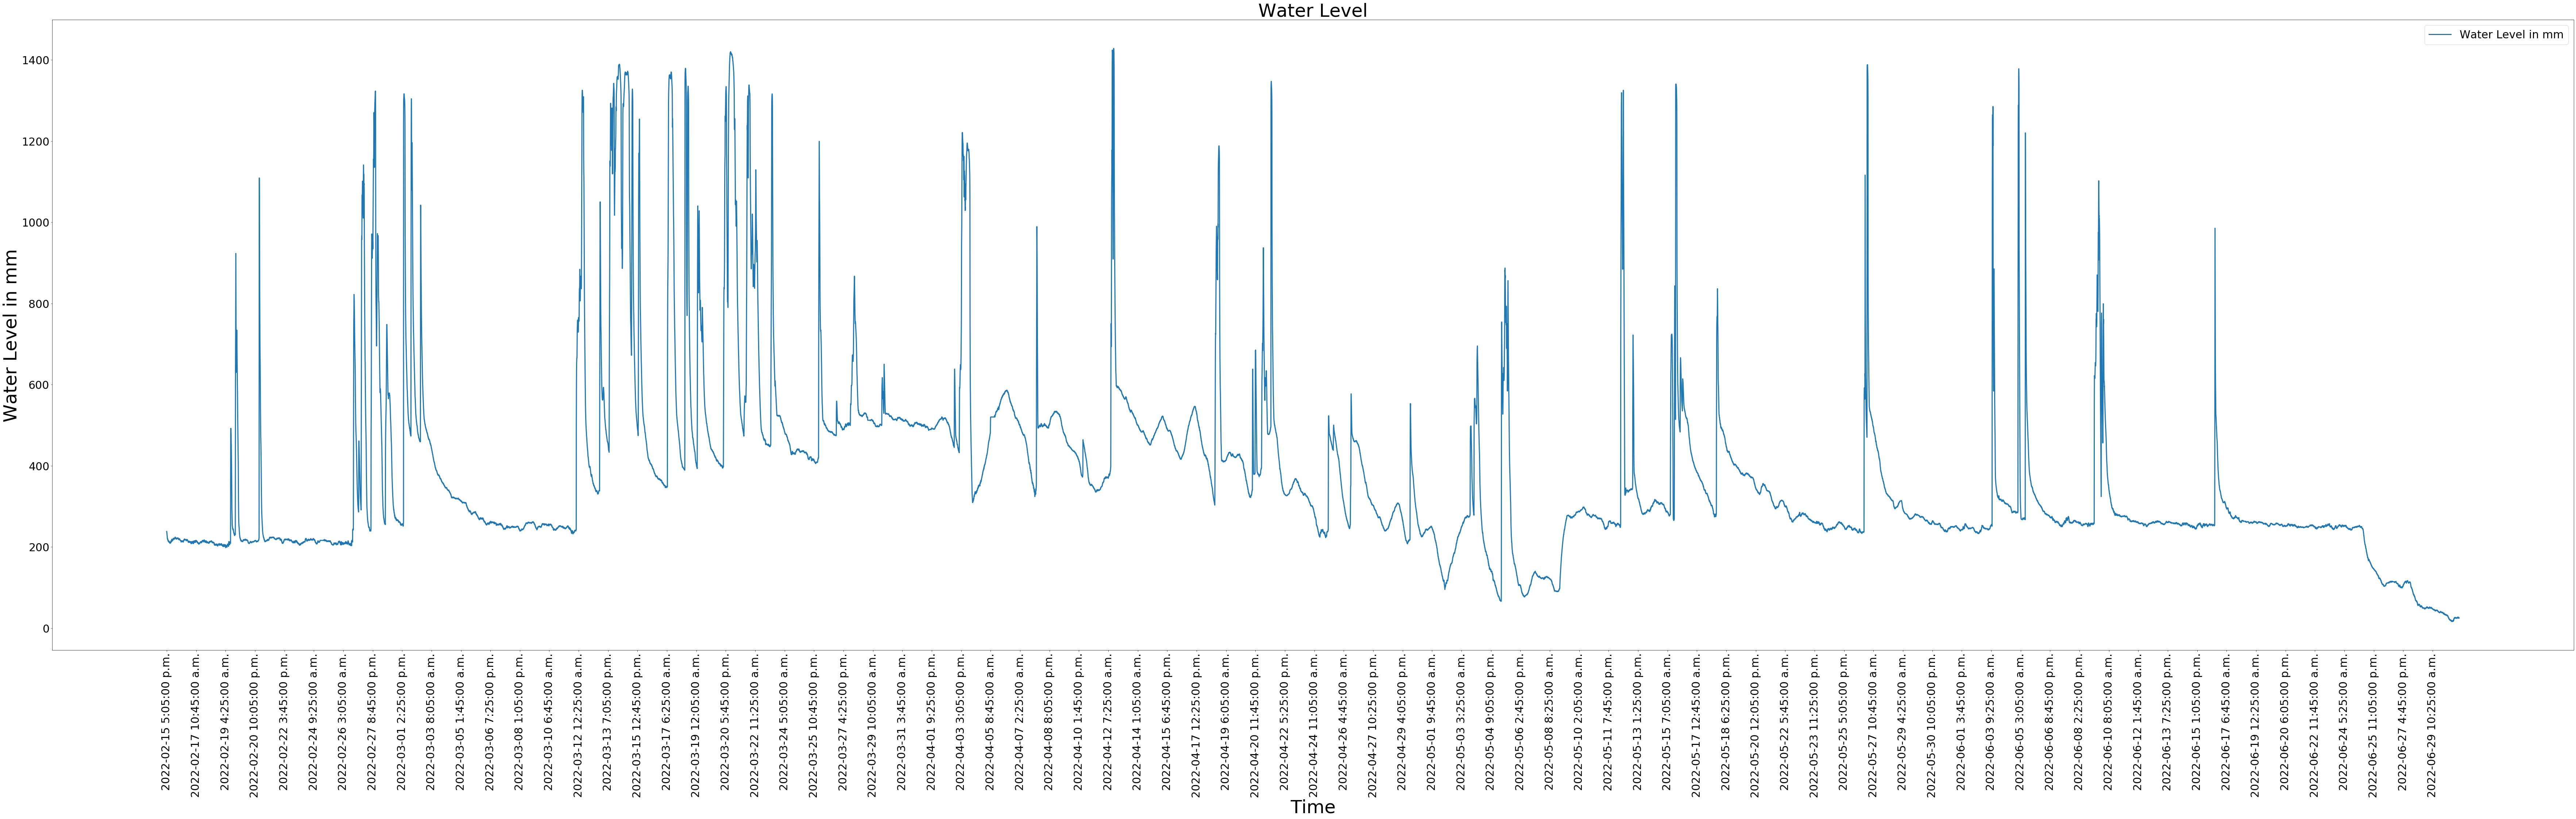

In [1502]:
std_movA=moving_std(sADF,6)
rng3pA=np.max(std_movA)*(3/100)
rng8pA=np.max(std_movA)*(7.5/100)
print(rng3pA,rng8pA)
#np.mean(std_movA)

fig=plt.figure(figsize=(120, 30))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([i for i in range(0,np.size(water_levelA),500)])
ax.set_xticklabels([sADF["Timestamp"][i] for i in range(0,np.size(water_levelA),500)])

plt.plot(wl_mmA,linewidth=3,label="Water Level in mm")
#plt.plot(std_movA,linewidth=3,color="green")
plt.xlabel('Time',fontsize=50)
plt.ylabel('Water Level in mm',fontsize=50)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',fontsize=30)
#plt.title("Water Level between "+sADF["Timestamp"][0]+"   to    "+sADF["Timestamp"][sADF.shape[0]-1],fontsize=50)
plt.title("Water Level",fontsize=50)
plt.show()

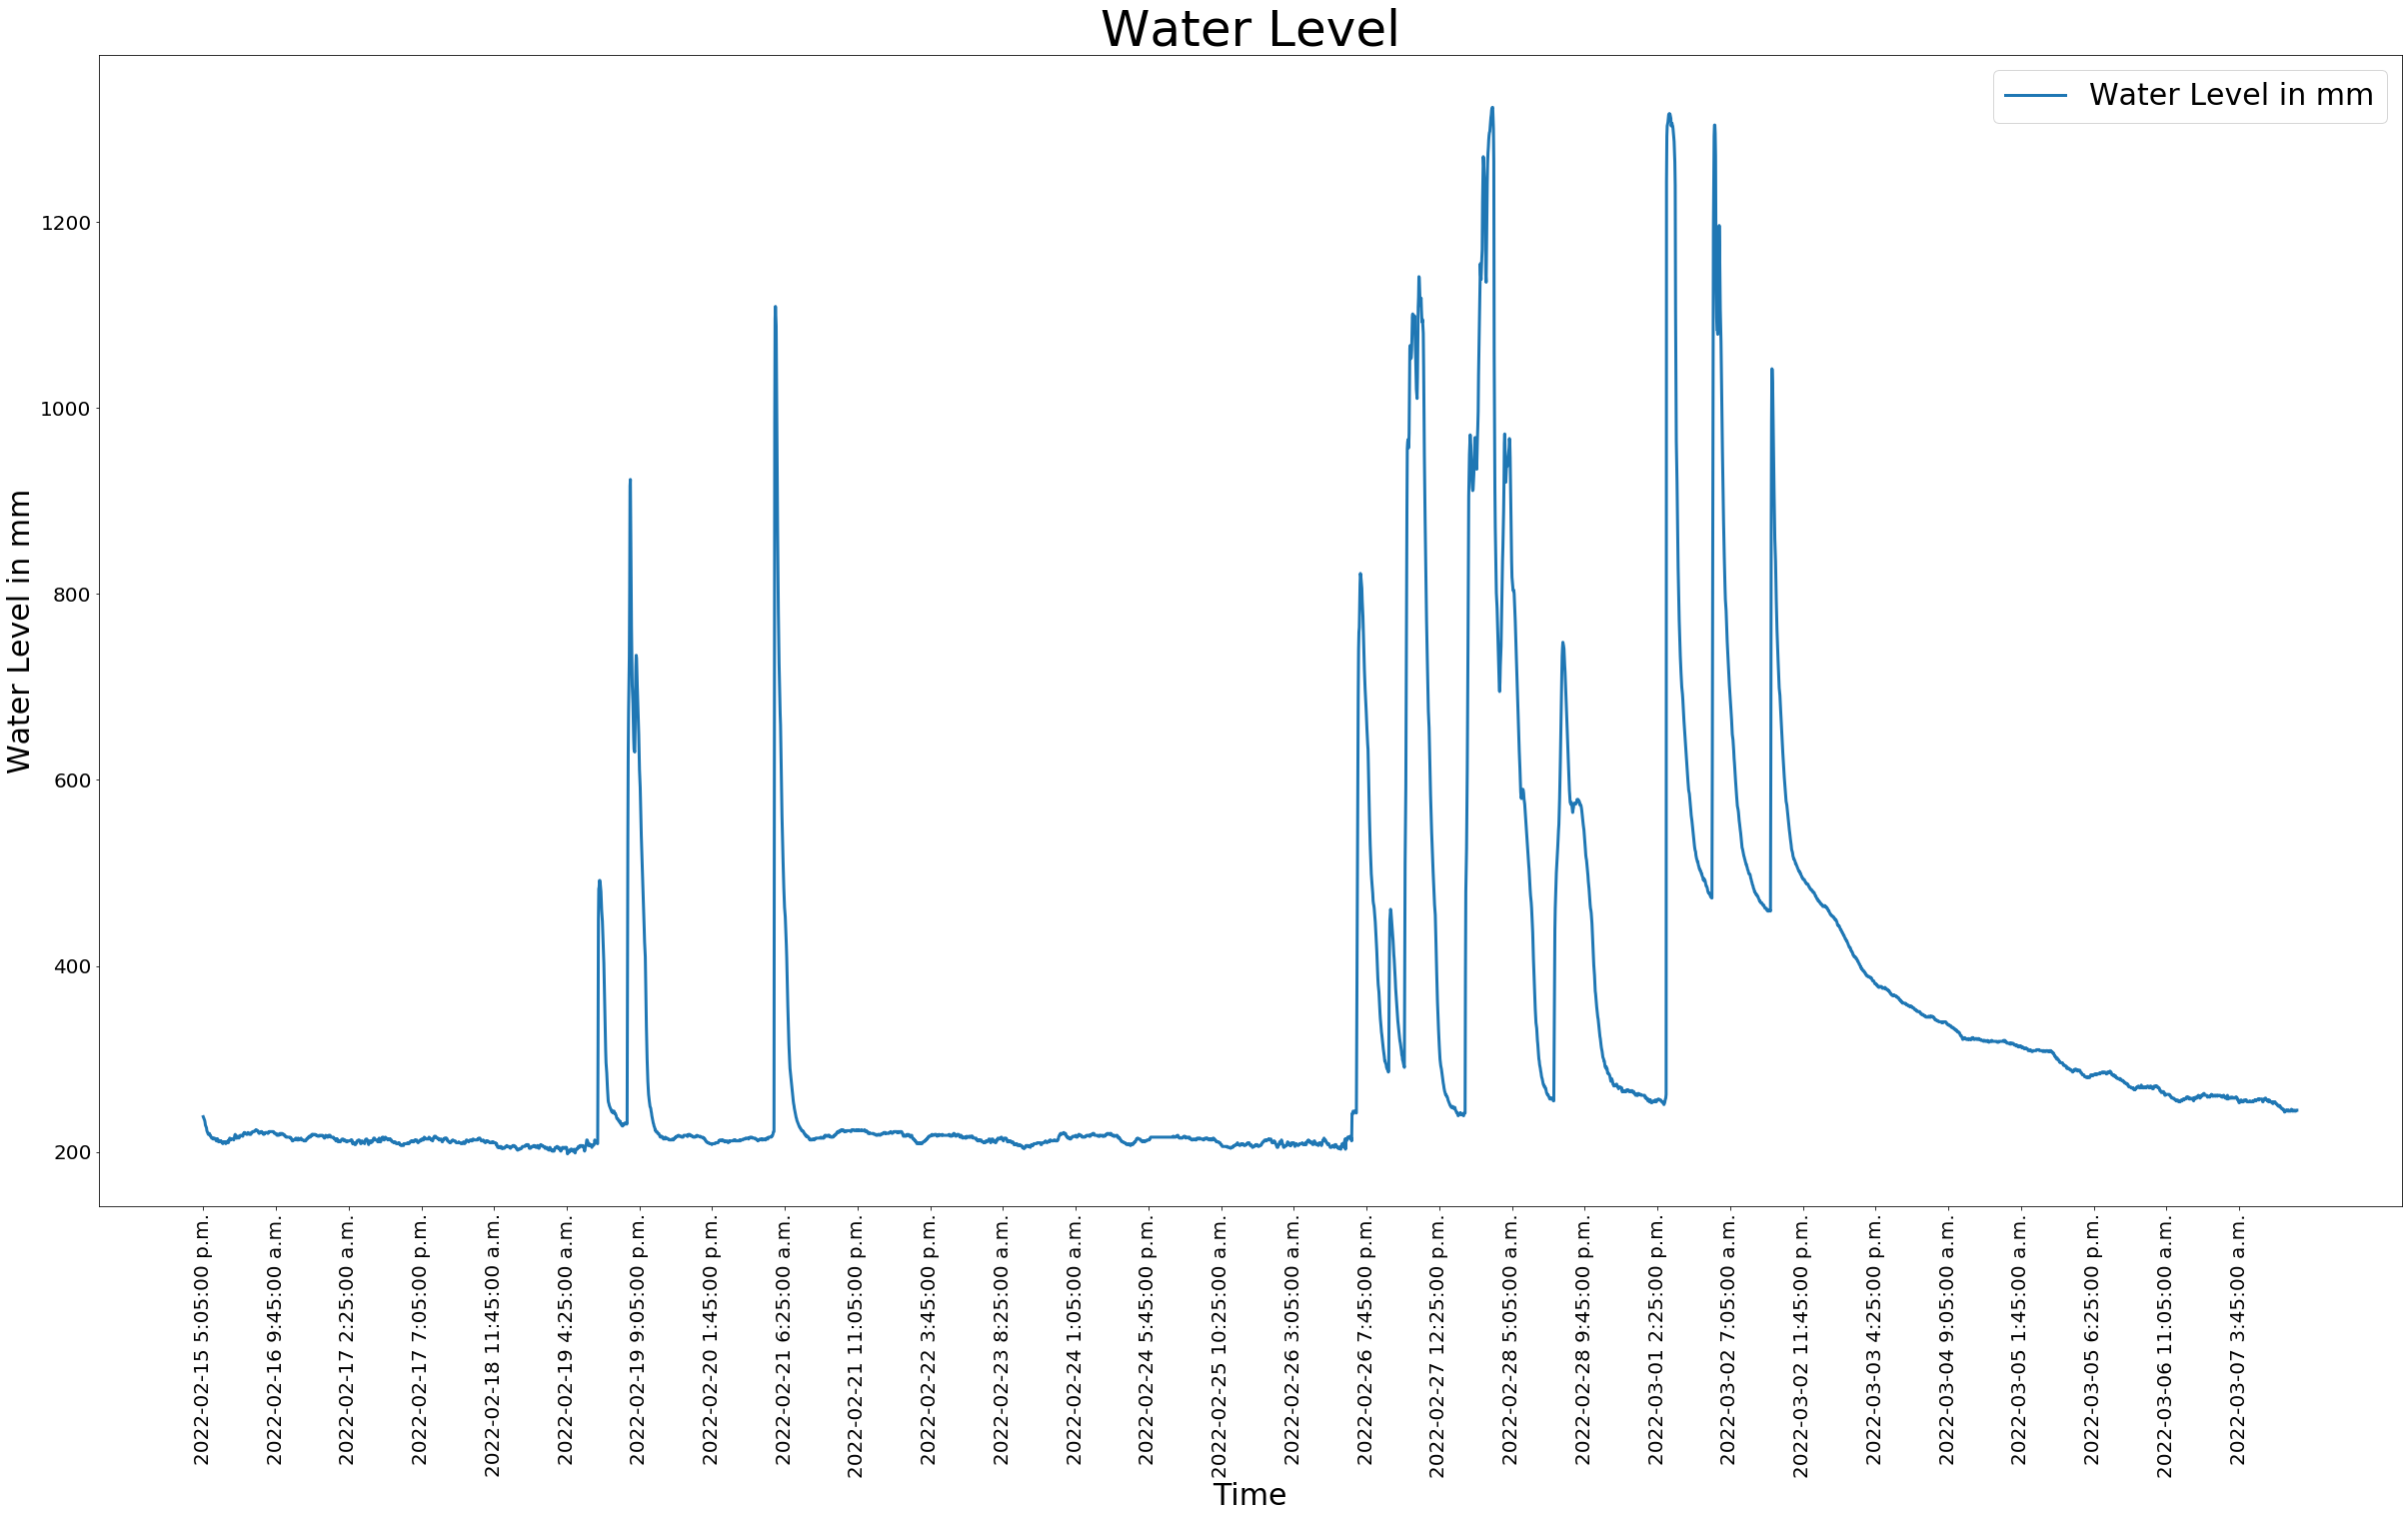

In [1631]:
fig=plt.figure(figsize=(40, 20))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([i for i in range(0,np.size(water_levelA[:5760]),200)])
ax.set_xticklabels([sADF["Timestamp"][i] for i in range(0,np.size(water_levelA[:5760]),200)])

plt.plot(wl_mmA[:5760],linewidth=3,label="Water Level in mm")
#plt.plot(std_movA,linewidth=3,color="green")
plt.xlabel('Time',fontsize=30)
plt.ylabel('Water Level in mm',fontsize=30)
plt.tick_params(axis='x',labelsize=20,rotation=90)
plt.tick_params(axis='y',labelsize=20)
plt.legend(loc = 'best',fontsize=30)
#plt.title("Water Level between "+sADF["Timestamp"][0]+"   to    "+sADF["Timestamp"][sADF.shape[0]-1],fontsize=50)
plt.title("Water Level",fontsize=50)
plt.show()

In [1417]:
# This part calculate all rainfall events
start_timeA,end_timeA,start_indexA,end_indexA,rf_durationA,water_levelA=IdentifyEvents_3(sADF,6,6)
rf_eventA=pd.DataFrame({"Rainfall_start_time":start_timeA,"Rainfall_end_time":end_timeA,"Rainfall_start_index":start_indexA,"Rainfall_end_index":end_indexA,"Rainfall_duration (periods)":rf_durationA})
rf_eventA

Rainfall_start_time         Rainfall_end_time  Rainfall_start_index  \
0   2022-02-19 11:50:00 a.m.   2022-02-20 5:05:00 a.m.                  1089   
1    2022-02-21 4:05:00 a.m.   2022-02-21 2:05:00 p.m.                  1572   
2    2022-02-26 5:45:00 p.m.   2022-03-01 7:25:00 a.m.                  3176   
3    2022-03-01 4:35:00 p.m.   2022-03-03 3:10:00 a.m.                  4026   
4    2022-03-11 9:15:00 p.m.   2022-03-12 7:55:00 p.m.                  6962   
5    2022-03-13 7:20:00 a.m.   2022-03-16 7:25:00 a.m.                  7359   
6    2022-03-17 7:20:00 a.m.  2022-03-19 10:30:00 p.m.                  8511   
7    2022-03-20 2:50:00 p.m.   2022-03-23 1:00:00 a.m.                  9465   
8    2022-03-23 9:55:00 a.m.  2022-03-23 10:40:00 p.m.                 10270   
9    2022-03-26 5:25:00 a.m.   2022-03-26 4:15:00 p.m.                 11080   
10   2022-03-28 4:30:00 a.m.   2022-03-28 6:15:00 p.m.                 11645   
11  2022-03-29 11:40:00 p.m.   2022-03-30 8:45:00 a.m.                 12163   
12   2022-04-03 5:50:00 a.m.  2022-04-04 11:55:00 a.m.                 13389   
13   2022-04-08 1:45:00 a.m.   2022-04-08 9:25:00 a.m.                 14780   
14  2022-04-12 11:10:00 a.m.  2022-04-12 11:50:00 p.m.                 16045   
15   2022-04-18 2:50:00 p.m.   2022-04-19 4:55:00 a.m.                 17817   
16   2022-04-20 7:40:00 p.m.   2022-04-22 5:40:00 p.m.                 18451   
17   2022-04-25 7:05:00 a.m.   2022-04-25 1:55:00 p.m.                 19740   
18   2022-04-26 3:00:00 p.m.   2022-04-26 9:50:00 p.m.                 20123   
19   2022-04-30 2:55:00 a.m.   2022-04-30 6:15:00 p.m.                 21130   
20   2022-05-03 4:10:00 p.m.   2022-05-04 3:45:00 p.m.                 22153   
21  2022-05-05 12:00:00 p.m.   2022-05-06 2:00:00 p.m.                 22679   
22   2022-05-09 2:10:00 a.m.  2022-05-09 10:15:00 a.m.                 23713   
23   2022-05-12 1:00:00 p.m.   2022-05-13 3:30:00 p.m.                 24707   
24  2022-05-15 11:35:00 a.m.  2022-05-16 12:00:00 p.m.                 25554   
25   2022-05-18 4:40:00 a.m.   2022-05-18 1:55:00 p.m.                 26335   
26   2022-05-26 9:35:00 p.m.  2022-05-27 10:50:00 a.m.                 28842   
27  2022-06-03 10:55:00 a.m.   2022-06-03 9:35:00 p.m.                 31018   
28  2022-06-04 11:30:00 p.m.   2022-06-05 9:30:00 p.m.                 31457   
29  2022-06-09 11:30:00 a.m.   2022-06-10 2:30:00 p.m.                 32753   
30   2022-06-16 2:15:00 p.m.   2022-06-17 1:45:00 a.m.                 34802   

    Rainfall_end_index  Rainfall_duration (periods)  
0                 1296                          207  
1                 1692                          120  
2                 3916                          740  
3                 4441                          415  
4                 7234                          272  
5                 8224                          865  
6                 9269                          758  
7                10163                          698  
8                10423                          153  
9                11210                          130  
10               11810                          165  
11               12272                          109  
12               13750                          361  
13               14872                           92  
14               16197                          152  
15               17986                          169  
16               19003                          552  
17               19822                           82  
18               20205                           82  
19               21314                          184  
20               22436                          283  
21               22991                          312  
22               23810                           97  
23               25025                          318  
24               25847                          293  
25               26446                      

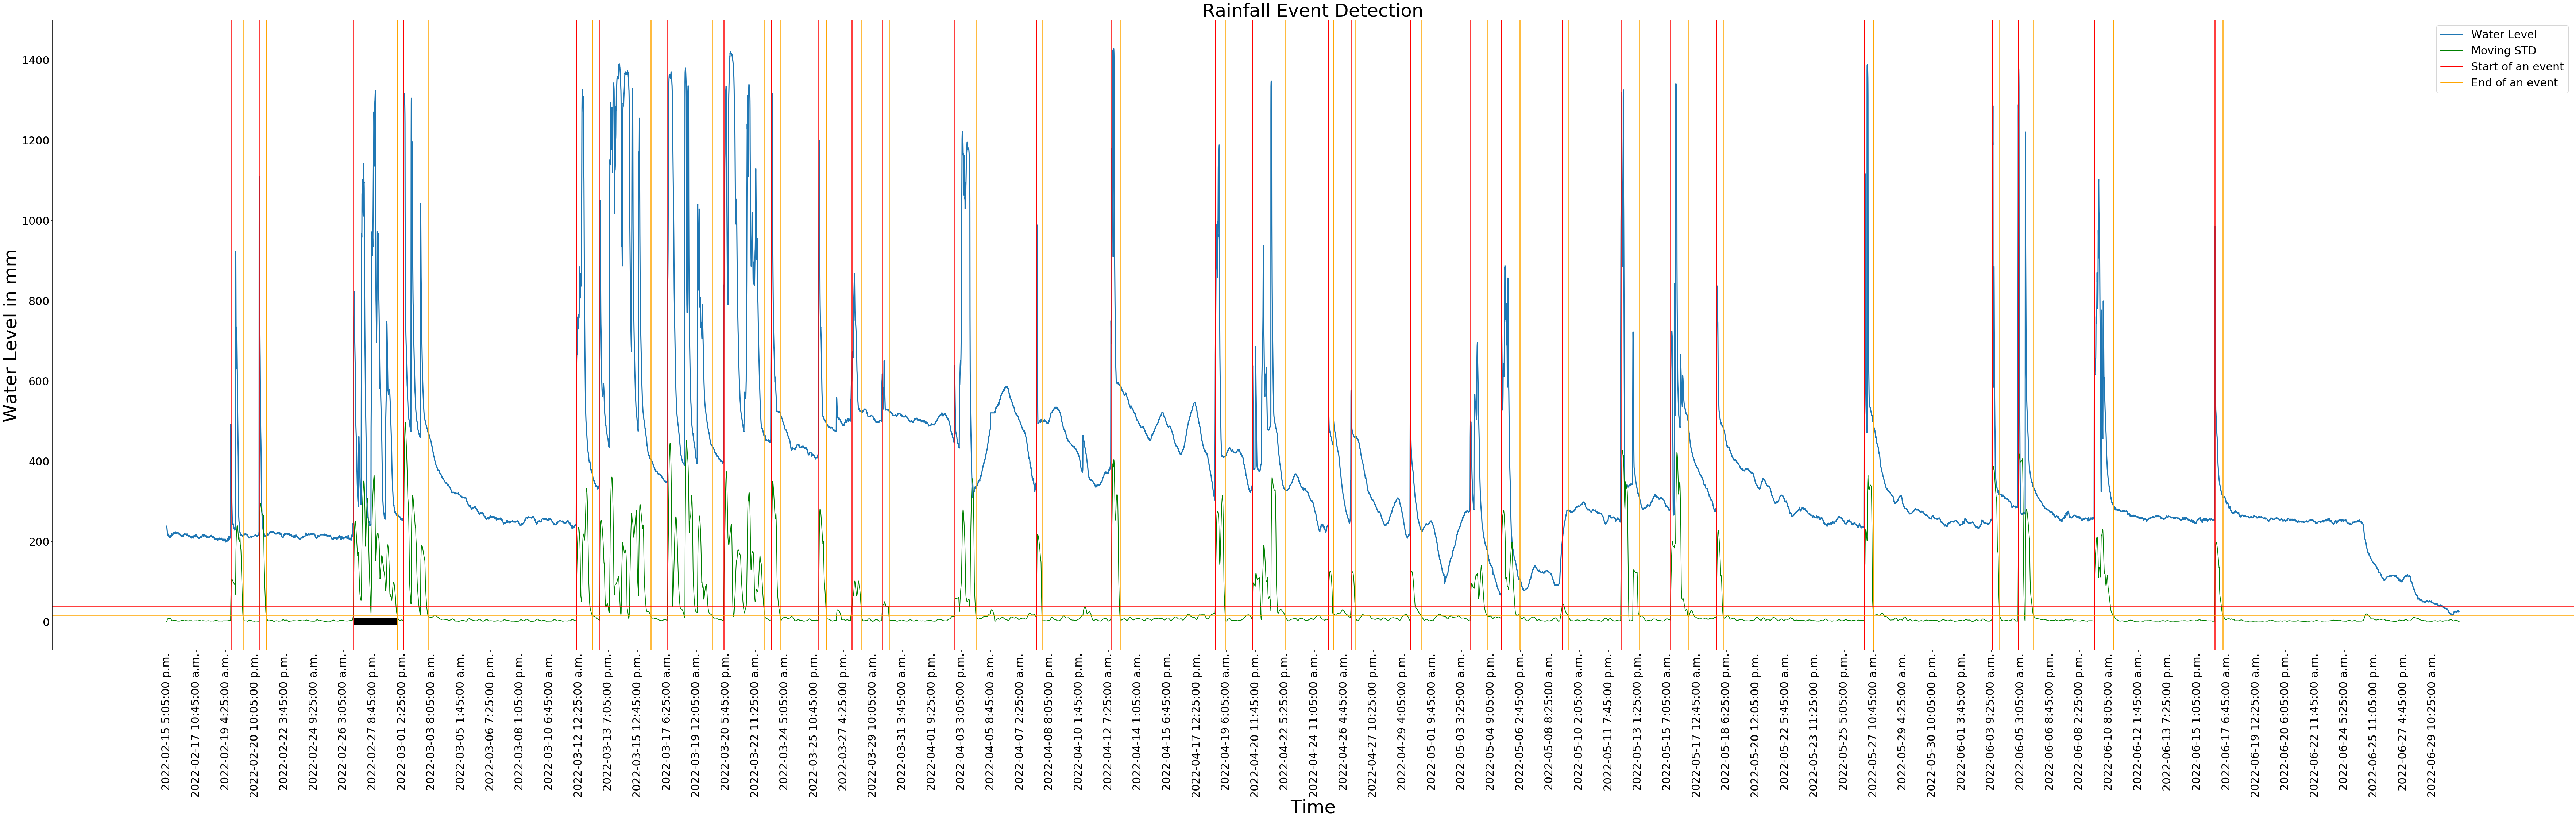

Avergae duration of rainfall event:  23.4758064516129  hours


In [1504]:
# This draw all data set with events being identified
fig=plt.figure(figsize=(120, 30))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([i for i in range(0,np.size(water_levelA),500)])
ax.set_xticklabels([sADF["Timestamp"][i] for i in range(0,np.size(water_levelA),500)])

wle,=plt.plot(water_levelA,label='Water Level',linewidth=3)
#plt.plot(mean_mov)
mstd,=plt.plot(std_movA,label="Moving STD",linewidth=2,color="green")
for i in start_indexA:
    st=plt.axvline(x=i, linewidth=2.5,color='r',label="Start of an event")
for i in end_indexA:
    en=plt.axvline(x=i,linewidth=2.5, color='orange',label="End of an event")
plt.axhline(y=rng3pA, color='orange', linestyle='-')
plt.axhline(y=rng8pA, color='red', linestyle='-')
plt.hlines(y=0,xmin=3176,xmax=3916, color='black', linewidth=20,linestyle='-')
plt.xlabel('Time',fontsize=50)
plt.ylabel('Water Level in mm',fontsize=50)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',handles=[wle,mstd,st,en],fontsize=30)
#plt.title("Water Level between "+sADF["Timestamp"][0]+"   to    "+sADF["Timestamp"][sADF.shape[0]-1],fontsize=50)
plt.title("Rainfall Event Detection",fontsize=50)
plt.show()
print("Avergae duration of rainfall event: ",np.mean(rf_durationA)*(5/60)," hours")

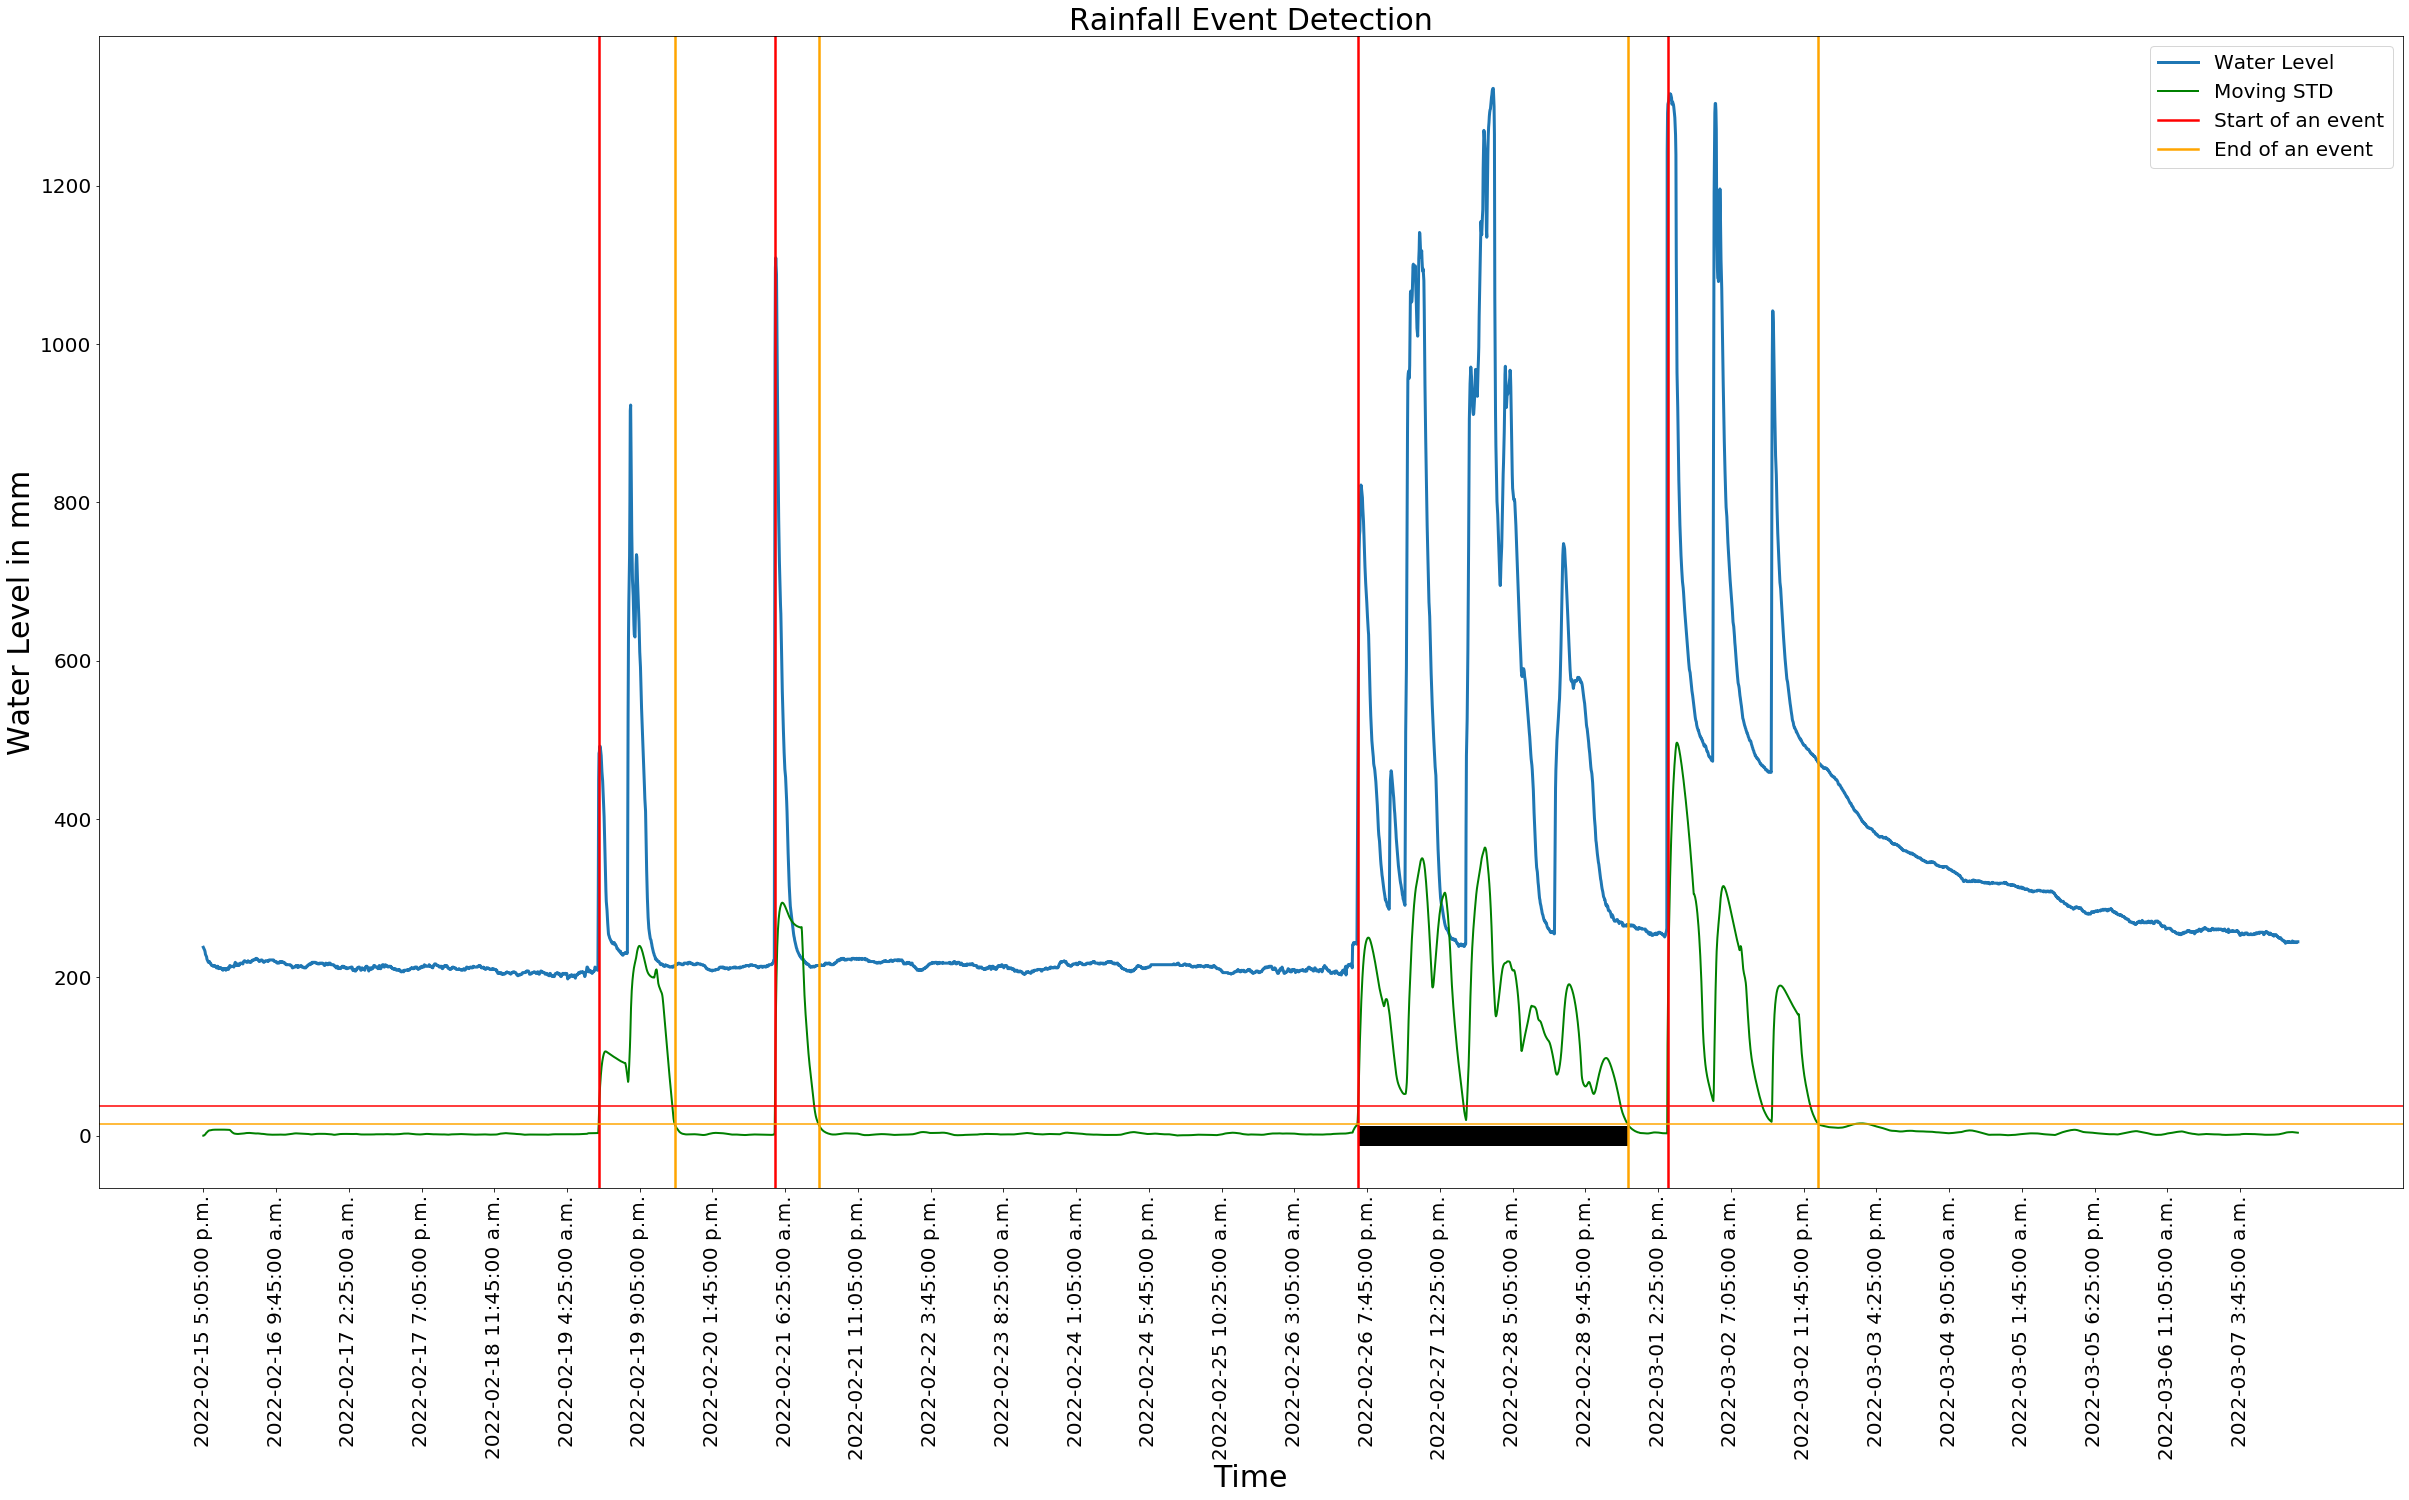

In [1626]:
# This draw (Partial) data set with events being identified
fig=plt.figure(figsize=(40, 20))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([i for i in range(0,np.size(water_levelA[:5760]),200)])
ax.set_xticklabels([sADF["Timestamp"][i] for i in range(0,np.size(water_levelA[:5760]),200)])

wle,=plt.plot(water_levelA[:5760],label='Water Level',linewidth=3)
#plt.plot(mean_mov)
mstd,=plt.plot(std_movA[:5760],label="Moving STD",linewidth=2,color="green")
for i in start_indexA[:4]:
    st=plt.axvline(x=i, linewidth=2.5,color='r',label="Start of an event")
for i in end_indexA[:4]:
    en=plt.axvline(x=i,linewidth=2.5, color='orange',label="End of an event")
plt.axhline(y=rng3pA, color='orange', linestyle='-')
plt.axhline(y=rng8pA, color='red', linestyle='-')
plt.hlines(y=0,xmin=3176,xmax=3916, color='black', linewidth=20,linestyle='-')
plt.xlabel('Time',fontsize=30)
plt.ylabel('Water Level in mm',fontsize=30)
plt.tick_params(axis='x',labelsize=20,rotation=90)
plt.tick_params(axis='y',labelsize=20)
plt.legend(loc = 'best',handles=[wle,mstd,st,en],fontsize=20)
#plt.title("Water Level between "+sADF["Timestamp"][0]+"   to    "+sADF["Timestamp"][5760],fontsize=30)
plt.title("Rainfall Event Detection",fontsize=30)
plt.show()

Text(0.5, 1.0, 'Histogram for Rainfall Event Duration')

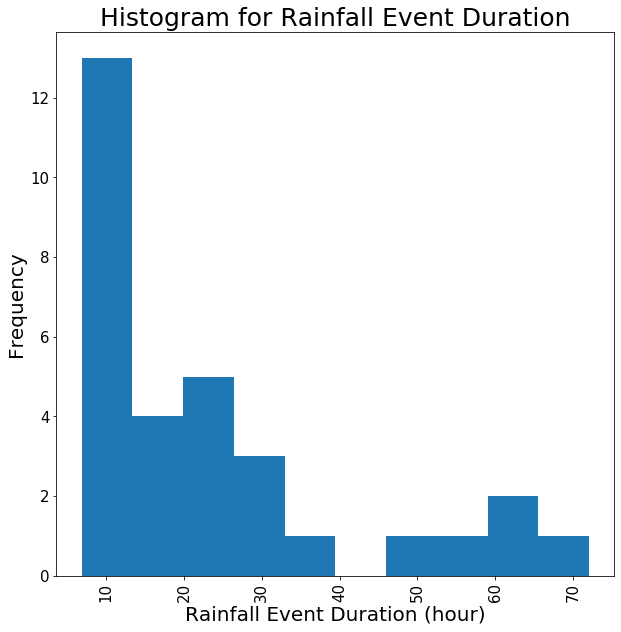

In [1612]:
plt.figure(figsize=(10, 10))
plt.hist(rf_durationA*(5/60))
plt.xlabel('Rainfall Event Duration (hour)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tick_params(axis='y',labelsize=15)
plt.title("Histogram for Rainfall Event Duration",fontsize=25)

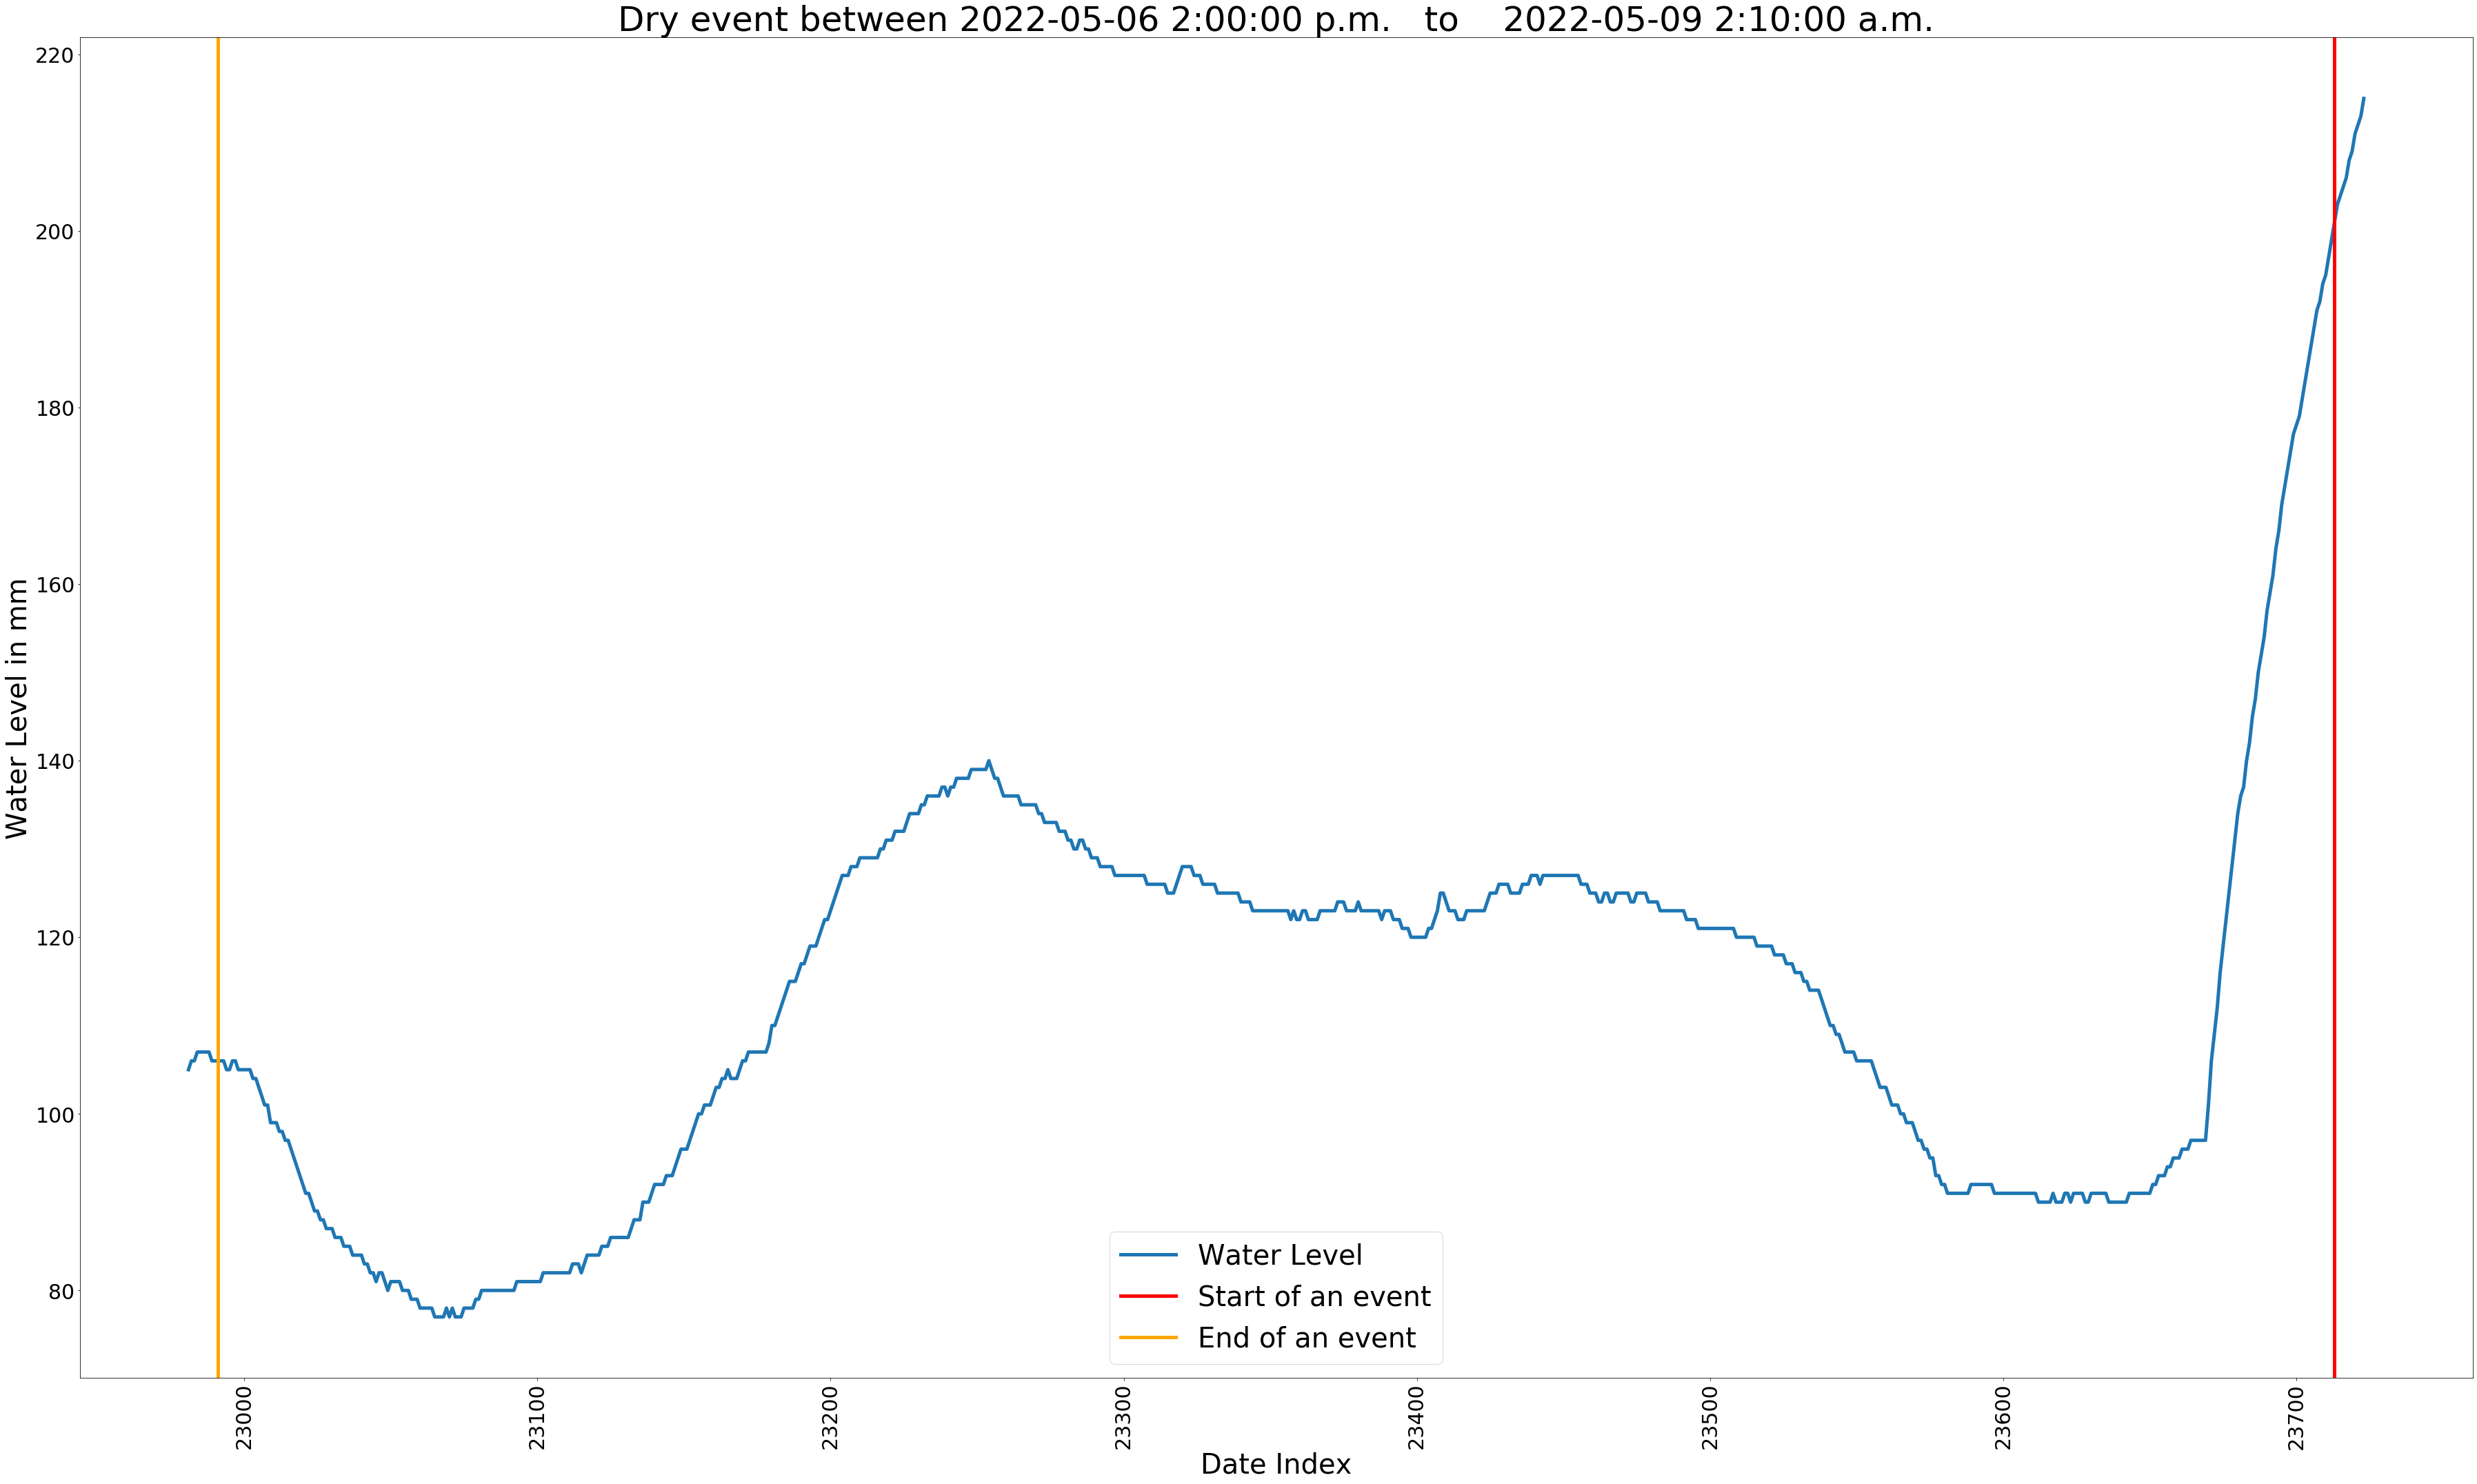

In [1329]:
# Let's look at a particular No !Rainfall event
buffer=10
index=22
X=range(end_indexA[index-1]-buffer,start_indexA[index]+buffer+1)
Y=water_levelA[rf_eventA["Rainfall_end_index"][index-1]-buffer:rf_eventA["Rainfall_start_index"][index]+buffer+1]
plt.figure(figsize=(50, 30))
plt.plot(X,Y,linewidth=5,label="Water Level")
plt.axvline(x=start_indexA[index], linewidth=5,color='r',label="Start of an event")
plt.axvline(x=end_indexA[index-1],linewidth=5, color='orange',label="End of an event")
plt.title('No Rainfall Event')
plt.xlabel('Date Index',fontsize=40)
plt.ylabel('Water Level in mm',fontsize=40)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',fontsize=40)
plt.title("Dry event between "+end_timeA[index-1]+"   to    "+start_timeA[index],fontsize=50)
plt.tight_layout()
plt.show()

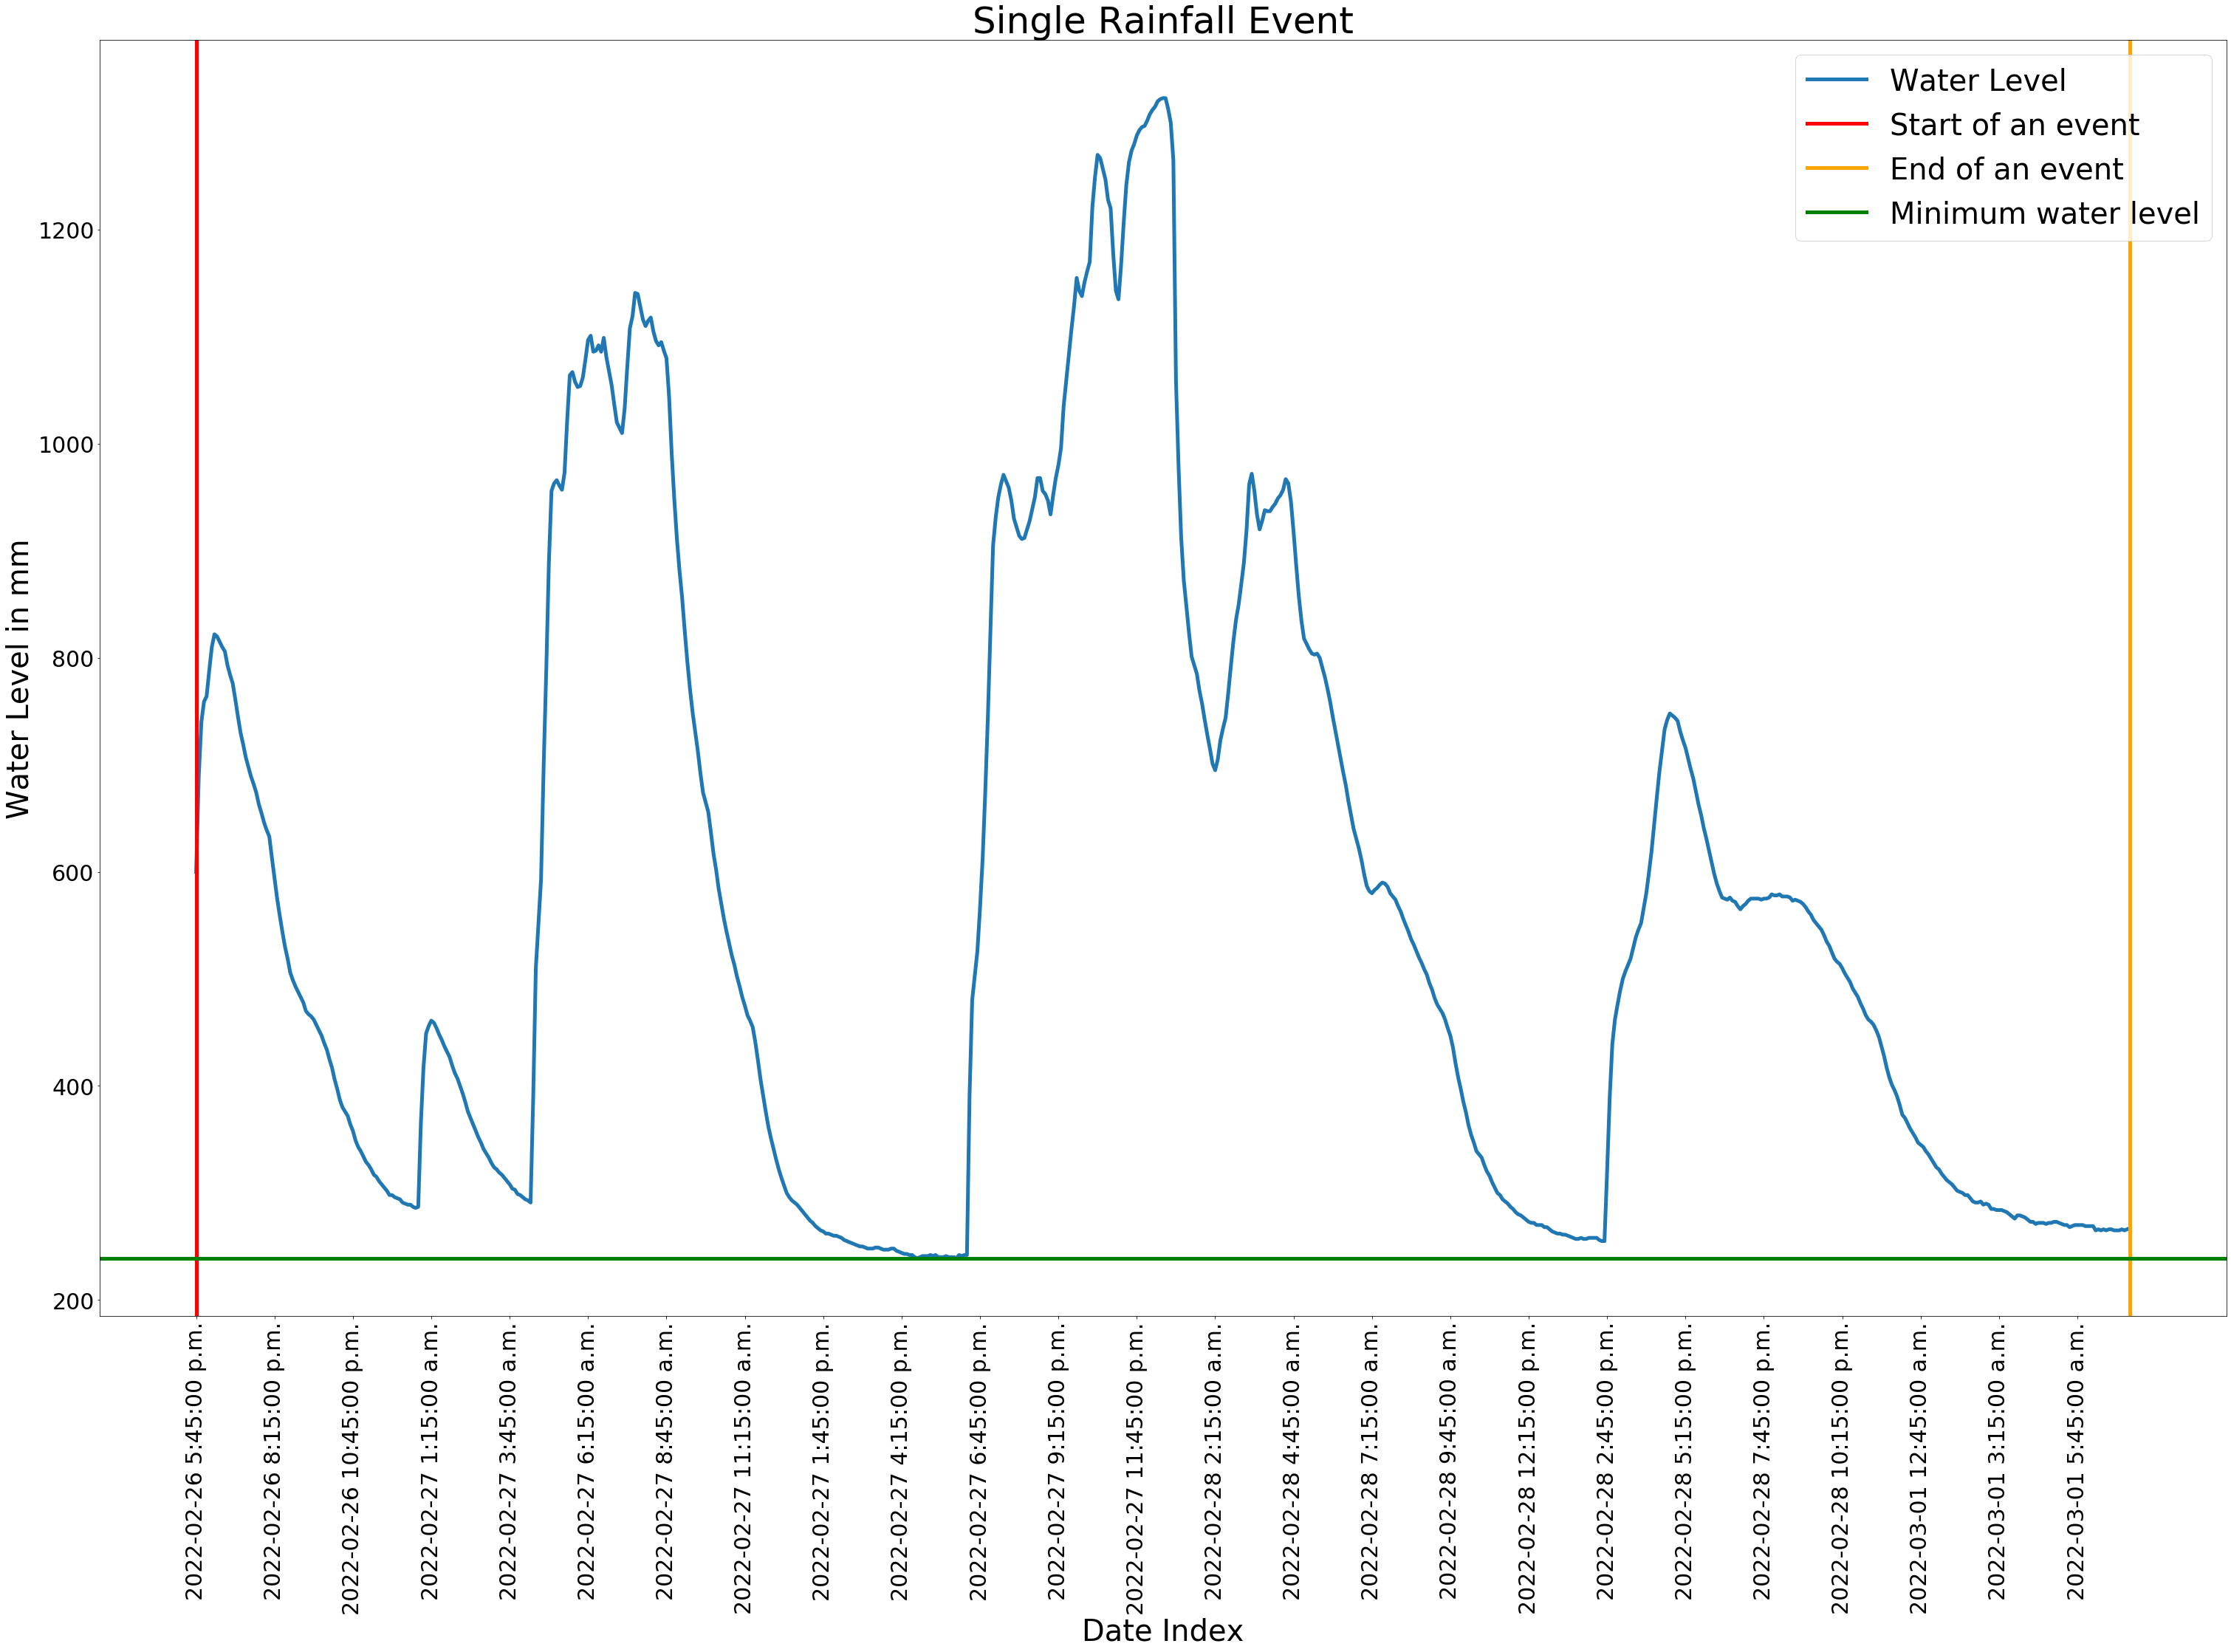

In [1700]:
# Let's see a particular !Rainfall event
buffer=0
index=2
#X=Timestamp[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer+1]
X=range(start_indexA[index]-buffer,end_indexA[index]+buffer+1)
Y=water_levelA[start_indexA[index]-buffer:end_indexA[index]+buffer+1]
fig=plt.figure(figsize=(50, 30))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([i for i in range(start_indexA[index],end_indexA[index],30)])
ax.set_xticklabels([sADF["Timestamp"][i] for i in range(start_indexA[index],end_indexA[index],30)])
plt.plot(X,Y,linewidth=5,label="Water Level")
plt.axvline(x=start_indexA[index],linewidth=5,color='r',label="Start of an event")
plt.axvline(x=end_indexA[index],linewidth=5, color='orange',label="End of an event")
plt.axhline(y=np.min(Y)+(np.max(Y)-np.min(Y))*0,color="green",label="Minimum water level",linewidth=5)
plt.title('Rainfall Event')
plt.xlabel('Date Index',fontsize=40)
plt.ylabel('Water Level in mm',fontsize=40)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',fontsize=40)

#plt.tight_layout()
plt.title("Single Rainfall Event",fontsize=50)
plt.show()

In [1580]:
#This calculates the drawdown rate for all rainfall events
drawdown_duration=[]
drawdown_level=[]
drawdown_rate=[]
for i in range(np.size(start_indexA)):
    index=i
    max_mov=moving_max(sADF[start_indexA[index]-buffer:end_indexA[index]+buffer],0.5)
    std_mov=moving_std(sADF[start_indexA[index]-buffer:end_indexA[index]+buffer],0.5)
    wl=water_levelA[start_indexA[index]-buffer:end_indexA[index]+buffer+1]
    
    # finding peak and bottom (wellflood duration)
    start=[]
    end=[]
    i=1
    while i <np.size(wl)-1:
        if max_mov[i]-wl[i]>0:
            start.append(i-1)
            while max_mov[i]-wl[i]>0:
                i+=1
                if i>=np.size(wl):
                    break
            end.append(i-1)
        i+=1
    # Discards peaks that's have very small amount of drawdown
    i=0
    while i<np.size(start)-1:
        if abs(wl[start[i]]-wl[end[i]])<150:
            if wl[start[i]]<wl[start[i+1]]:
                start.pop(i)
                end.pop(i)
            else:
                start.pop(i+1)
                end.pop(i)
            continue
        else:
            i+=1
    i=0
    while i<np.size(start)-1:  
        if abs(wl[end[i]]-wl[start[i+1]])<150:
            end.pop(i)
            start.pop(i+1)
            continue
        else:
            i+=1
    # Discard peaks which are very close to each other
    i=0
    while i<np.size(start)-1:
        if (start[i+1]-start[i])<25:
            if wl[start[i+1]]>wl[start[i]]:
                start.pop(i)
                end.pop(i)
            else:
                start.pop(i+1)
                end.pop(i)
            continue
        else:
            i+=1   
            
    
    for i in range(np.size(start)):
        dd=((end[i]-start[i])*5)/60        # Measured in hours
        dl=wl[start[i]]-wl[end[i]]    #measured in mm
        dr=dl/dd                      #Measured in mm/hour
        drawdown_duration.append(dd)
        drawdown_level.append(dl)
        drawdown_rate.append(dr)

No of Drawdown:  63  Average Drawdown Rate:  94.77941505200754


Text(0.5, 1.0, 'Histogram for Drawdown Rate')

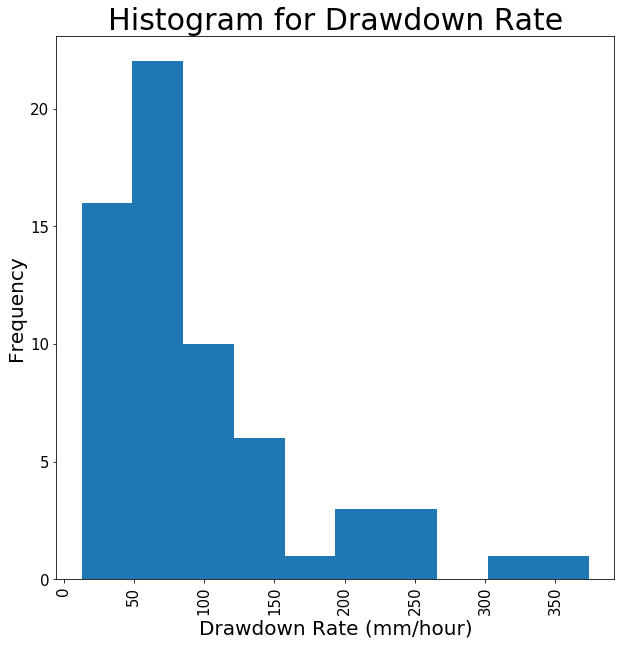

In [1590]:
print("No of Drawdown: ",np.size(drawdown_rate)," Average Drawdown Rate: ",np.mean(drawdown_rate))
plt.figure(figsize=(10, 10))
plt.hist(drawdown_rate)
plt.xlabel('Drawdown Rate (mm/hour)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tick_params(axis='y',labelsize=15)
plt.title("Histogram for Drawdown Rate",fontsize=30)

Text(0.5, 1.0, 'Histogram for Drawdown Time')

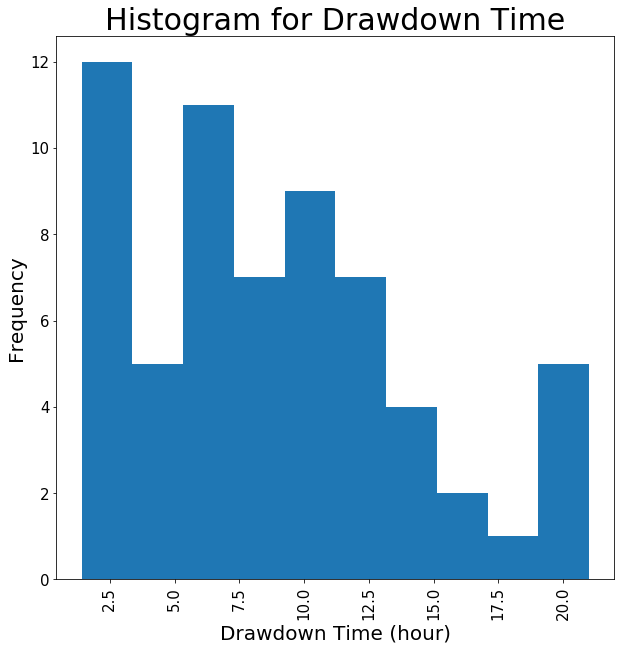

In [1592]:
plt.figure(figsize=(10, 10))
plt.hist(drawdown_duration)
plt.xlabel('Drawdown Time (hour)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tick_params(axis='y',labelsize=15)
plt.title("Histogram for Drawdown Time",fontsize=30)

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(drawdown_duration)
plt.xlabel('Drawdown Time (hour)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tick_params(axis='y',labelsize=15)
plt.title("Histogram for Drawdown Time",fontsize=30)

741


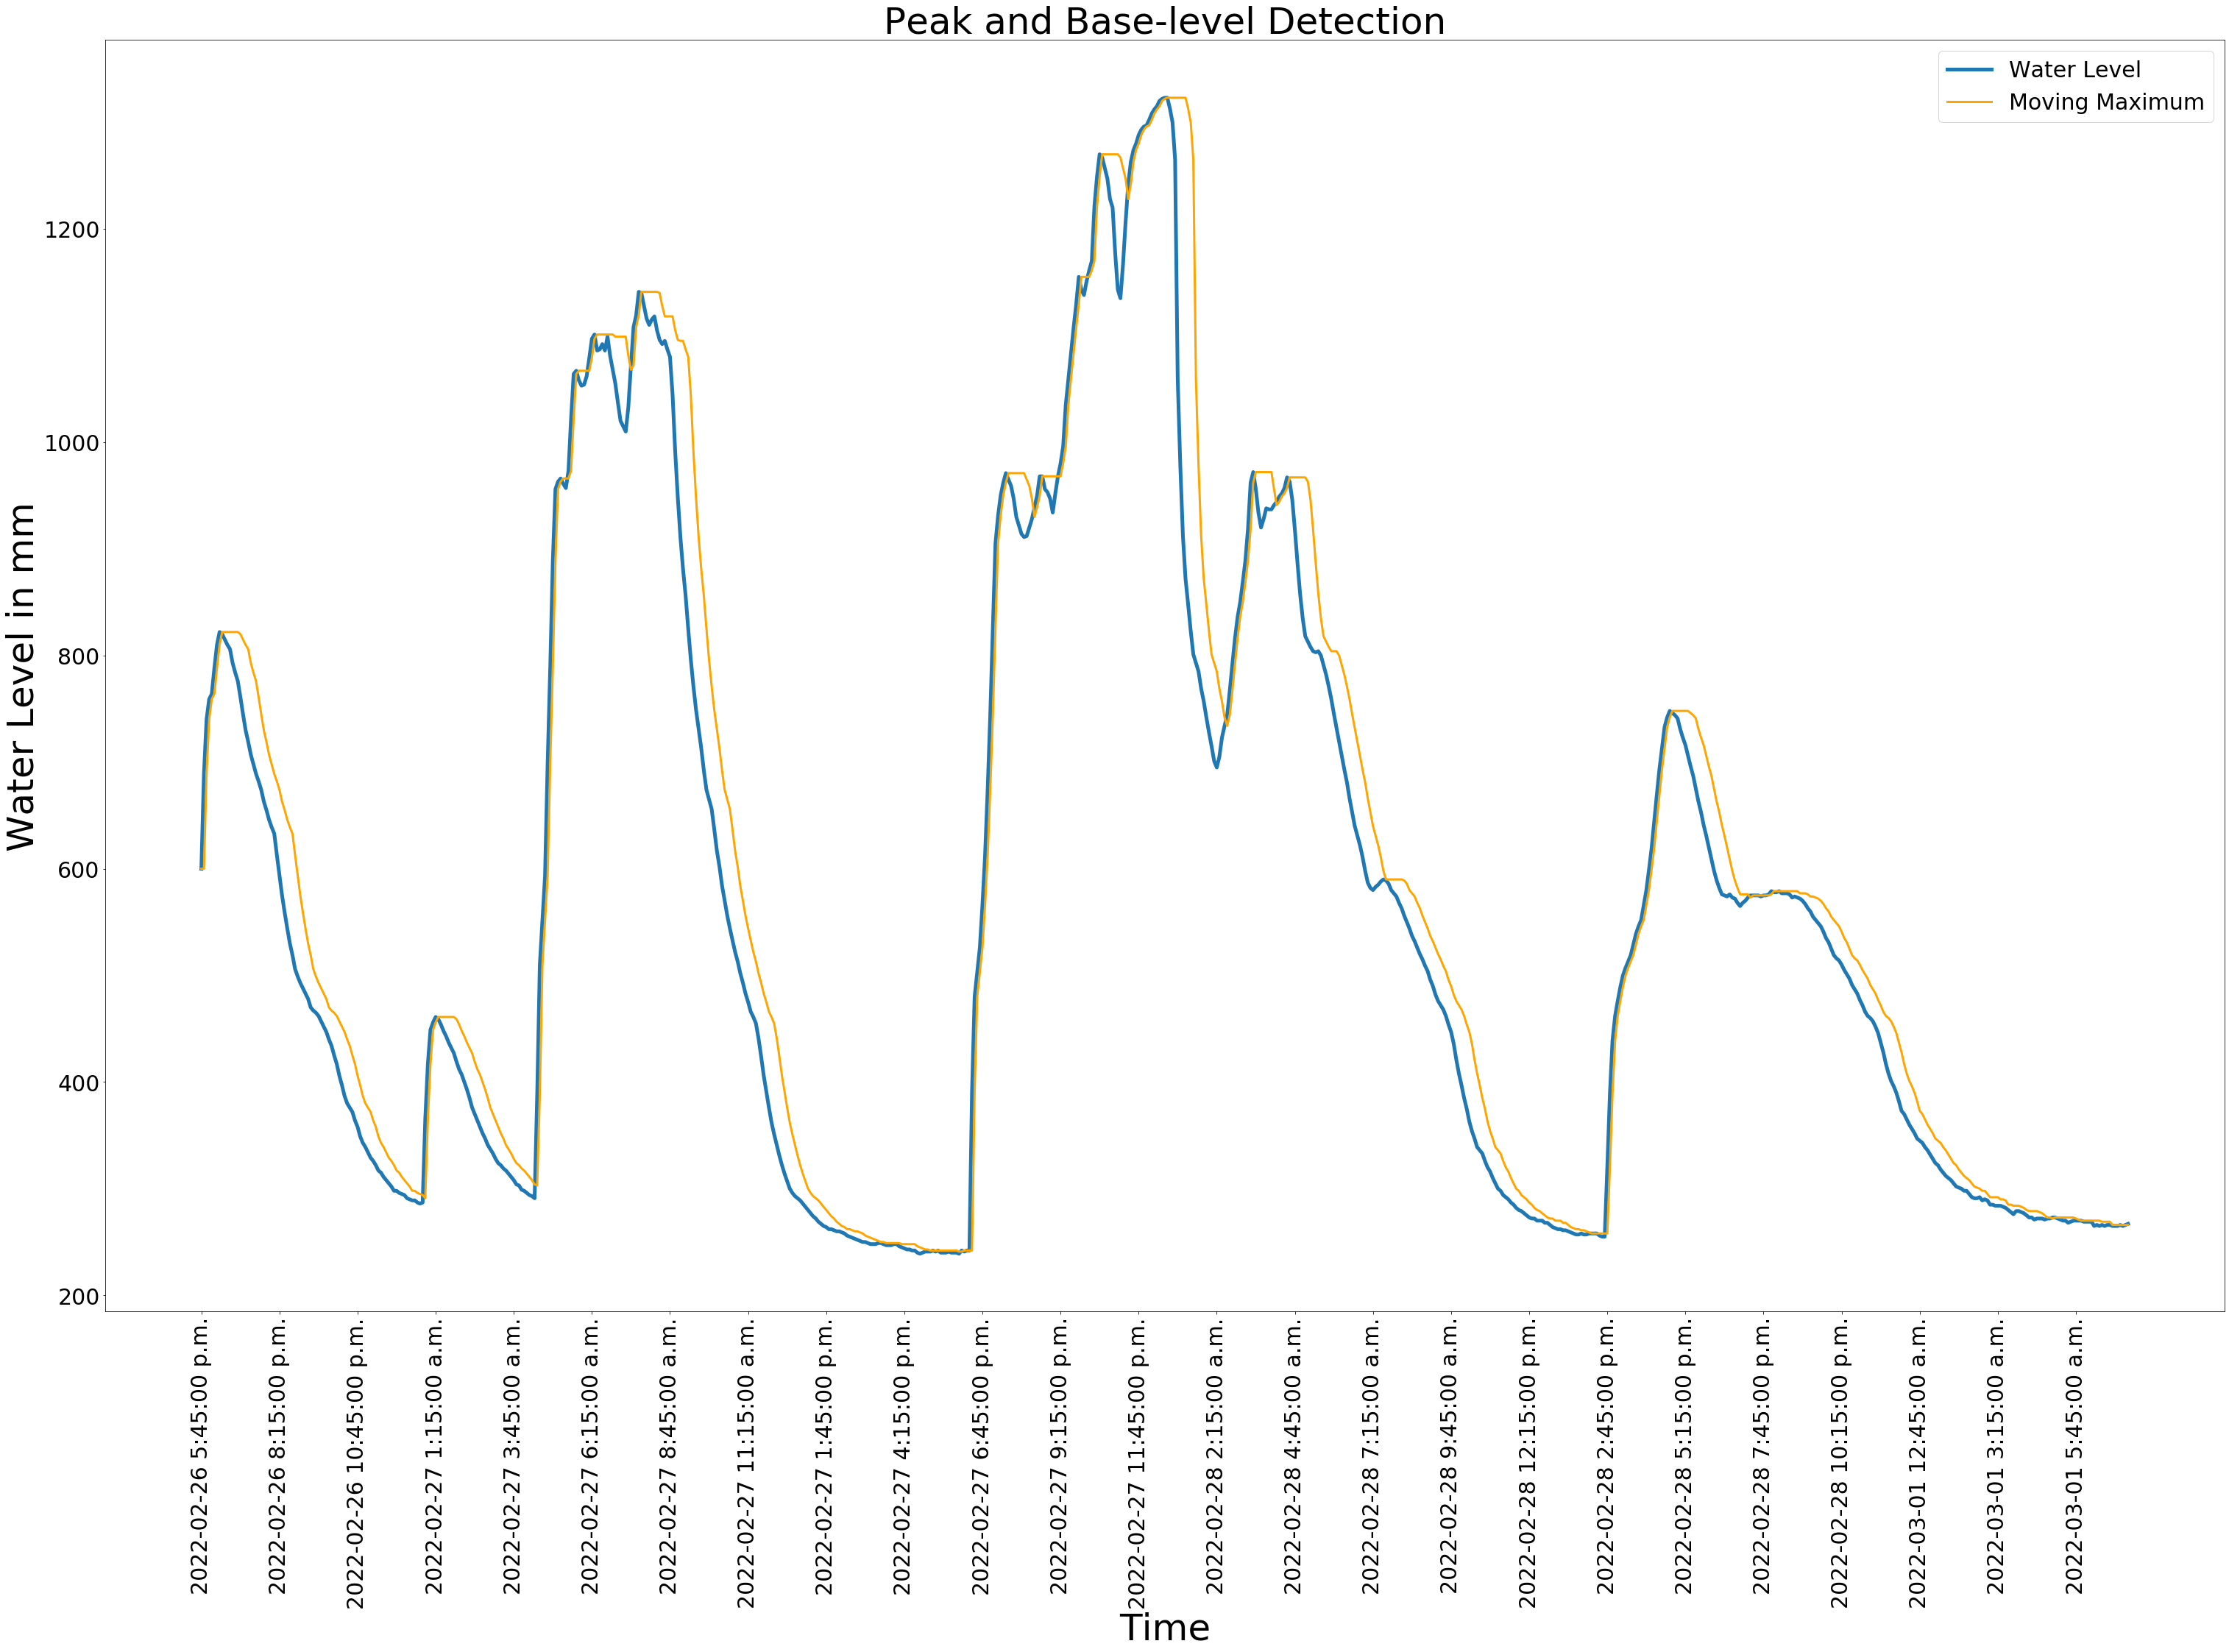

In [1698]:
# This part draws a particular event with moving MAX
buffer=0
index=2
max_mov=moving_max(sADF[start_indexA[index]-buffer:end_indexA[index]+buffer],0.5)
std_mov=moving_std(sADF[start_indexA[index]-buffer:end_indexA[index]+buffer],0.5)
wl=water_levelA[start_indexA[index]-buffer:end_indexA[index]+buffer+1]
print(np.size(wl))
fig=plt.figure(figsize=(50, 30))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([i for i in range(0,rf_durationA[index],30)])
ax.set_xticklabels([sADF["Timestamp"][i] for i in range(start_indexA[index],end_indexA[index],30)])
plt.plot(wl,linewidth=5,label="Water Level")
#plt.axhline(y=np.min(wl)+(np.max(wl)-np.min(wl))*.01)
plt.xlabel('Time',fontsize=50)
plt.ylabel('Water Level in mm',fontsize=50)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.plot(max_mov,linewidth=3,color="orange",label="Moving Maximum")
plt.title("Peak and Base-level Detection",fontsize=50)
plt.legend(loc = 'best',fontsize=30)

In [1655]:
(np.max(wl)-np.min(wl))*.05

54.20000000000002

In [1656]:
# finding peak and bottom (wellflood duration)
np.size(wl)
np.size(std_mov)
start=[]
end=[]
i=1
while i <np.size(wl)-1:
    if max_mov[i]-wl[i]>0:
        start.append(i-1)
        while max_mov[i]-wl[i]>0:
            i+=1
            if i>=np.size(wl):
                break
        end.append(i-1)
    i+=1
np.size(start)
print(start)

[7, 90, 138, 144, 151, 168, 281, 283, 292, 309, 323, 337, 345, 371, 404, 417, 536, 564, 598, 603, 606, 712, 722, 737]


In [1657]:
# Discards peaks that's have very small amount of drawdown
i=0
while i<np.size(start)-1:
    if abs(wl[start[i]]-wl[end[i]])<150:
        if wl[start[i]]<wl[start[i+1]]:
            start.pop(i)
            end.pop(i)
        else:
            start.pop(i+1)
            end.pop(i)
        continue
    else:
        i+=1
print(start)
i=0
while i<np.size(start)-1:  
    if abs(wl[end[i]]-wl[start[i+1]])<150:
        end.pop(i)
        start.pop(i+1)
        continue
    else:
        i+=1
print(start)
# Discard peaks which are very close to each other
i=0
while i<np.size(start)-1:
    if (start[i+1]-start[i])<25:
        if wl[start[i+1]]>wl[start[i]]:
            start.pop(i)
            end.pop(i)
        else:
            start.pop(i+1)
            end.pop(i)
        continue
    else:
        i+=1   
print(start)

[7, 90, 168, 371, 404, 564, 603, 712]
[7, 90, 168, 371, 404, 564]
[7, 90, 168, 371, 404, 564]


In [1658]:
def moving_std_np(wl_mm,period_in_hour):      
    #wl_mm=df[" Water Level [m]"].to_numpy()*1000  # water level in mm
    mov_std=[0]
    mean_mov=[wl_mm[0]]
    for i in range(np.size(wl_mm)):
        periods=int(period_in_hour*(60/5))    
        if i<periods:
            mov_std.append(np.std(wl_mm[:i+1]))
            mean_mov.append(np.mean(wl_mm[:i+1]))
        else:
            mov_std.append(np.std(wl_mm[i-periods:i+1]))
            mean_mov.append(np.mean(wl_mm[i-periods:i+1]))
    return mov_std
mstd=moving_std_np(wl,3)
np.max(mstd)*(3/100)

10.058027092062355

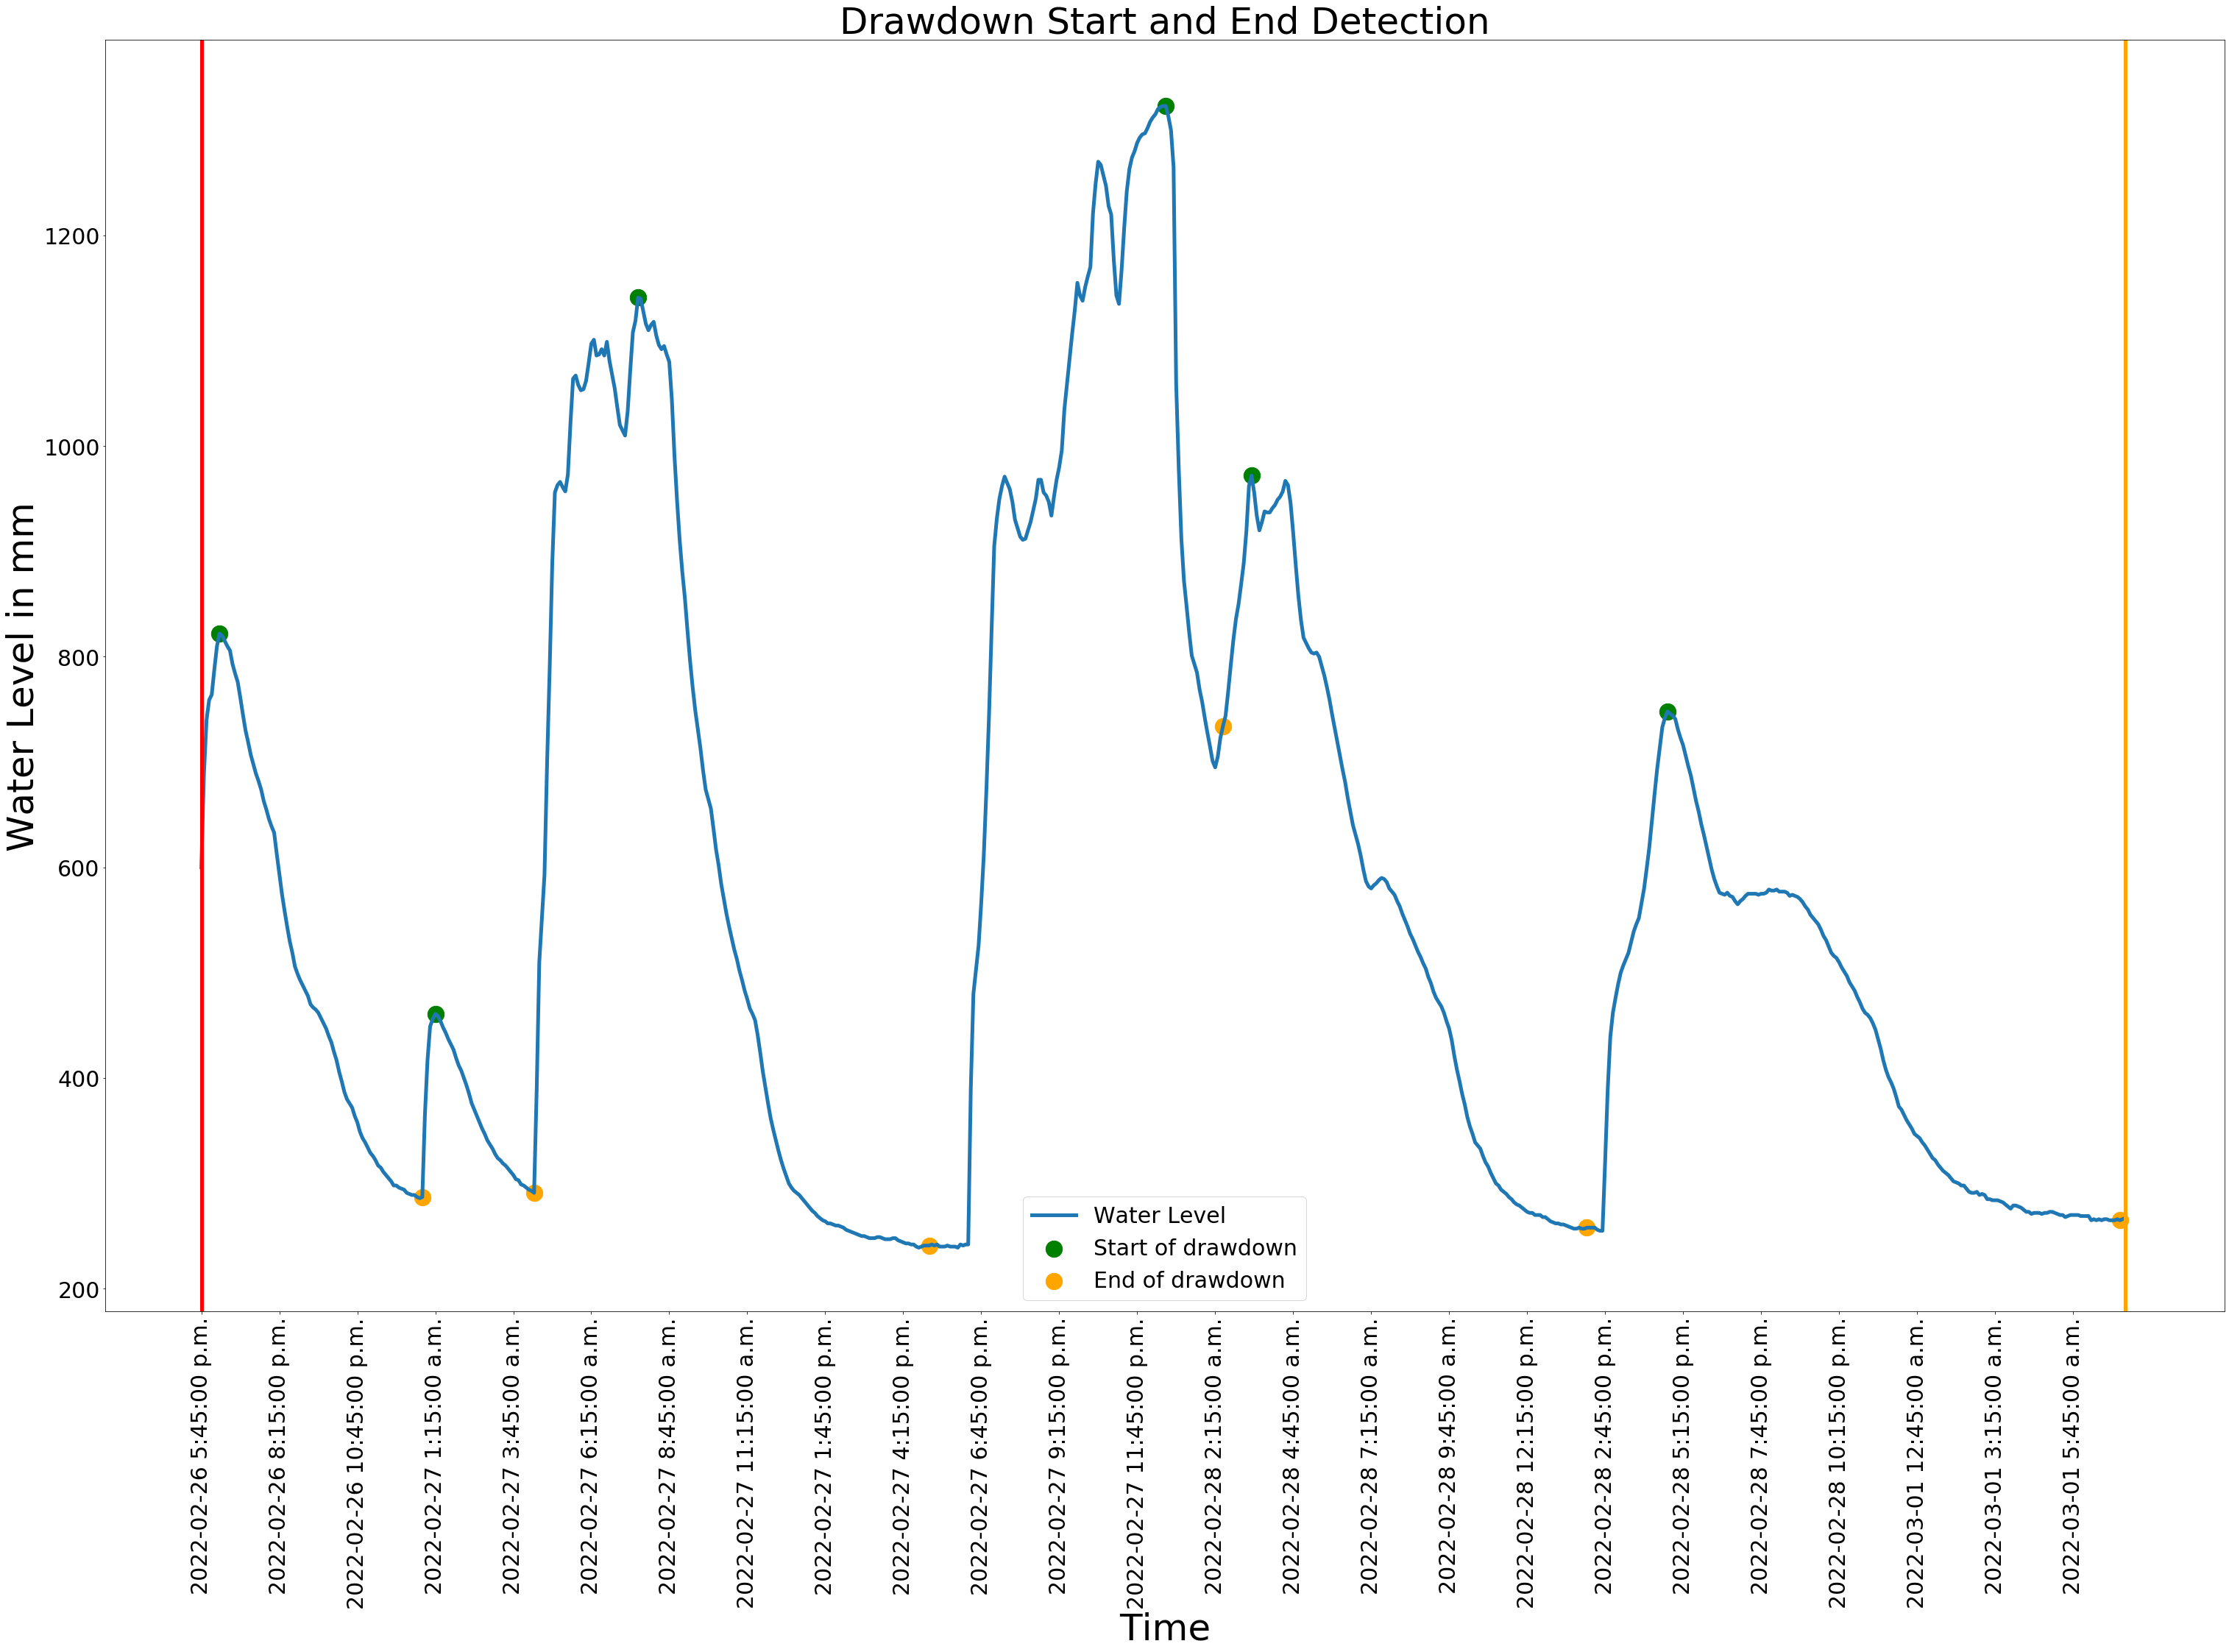

In [1688]:
fig=plt.figure(figsize=(50, 30))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([i for i in range(0,rf_durationA[index],30)])
ax.set_xticklabels([sADF["Timestamp"][i] for i in range(start_indexA[index],end_indexA[index],30)])
wle,=plt.plot(wl,label="Water Level",linewidth=5)
for i in start:
    st=plt.scatter(i,wl[i],marker="o",s=500,color='green',label="Start of drawdown")
for i in end:
    en=plt.scatter(i,wl[i],s=500,marker="o", color='orange',label="End of drawdown")

plt.axvline(x=0,linewidth=5,color='r',label="Start of an event")
plt.axvline(x=np.size(wl)-1,linewidth=5, color='orange',label="End of an event")    
#plt.plot(abs(np.diff(wl)))
#plt.plot(mstd)
#plt.axhline(y=14.2)
plt.xlabel('Time',fontsize=50)
plt.ylabel('Water Level in mm',fontsize=50)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',handles=[wle,st,en],fontsize=30)
plt.title("Drawdown Start and End Detection",fontsize=50)
plt.show()

In [1572]:
drawdown_duration=[]
drawdown_level=[]
drawdown_rate=[]

In [1573]:
for i in range(np.size(start)):
    dd=((end[i]-start[i])*5)/60        # Measured in hours
    dl=wl[start[i]]-wl[end[i]]    #measured in mm
    dr=dl/dd                      #Measured in mm/hour
    drawdown_duration.append(dd)
    drawdown_level.append(dl)
    drawdown_rate.append(dr)

In [1574]:
drawdown_rate

[82.30769230769232,
 53.68421052631577,
 96.42857142857142,
 321.27272727272737,
 66.4186046511628,
 33.310344827586206]

In [1575]:
drawdown_duration

[6.5, 3.1666666666666665, 9.333333333333334, 1.8333333333333333, 10.75, 14.5]

In [1576]:
drawdown_level

[535.0000000000001, 169.99999999999994, 900.0, 589.0000000000001, 714.0, 483.0]

In [1577]:
np.mean(drawdown_rate)

108.90369183567599

(array([2., 2., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 33.31034483,  62.10658307,  90.90282132, 119.69905956,
        148.49529781, 177.29153605, 206.08777429, 234.88401254,
        263.68025078, 292.47648903, 321.27272727]),
 <a list of 10 Patch objects>)

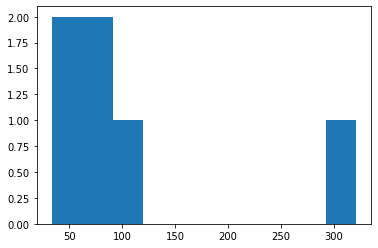

In [1579]:
plt.hist(drawdown_rate)

In [883]:
# This part is for site B

In [876]:
sBDF[" Water Level [m]"].where(sBDF[" Water Level [m]"]>0, 0,inplace=True)

In [1251]:
std_movB=moving_std(sBDF,6)
rng3pB=np.max(std_movB)*(3/100)
rng8pB=np.max(std_movB)*(8/100)

In [1250]:
start_timeB,end_timeB,start_indexB,end_indexB,rf_durationB,water_levelB=IdentifyEvents_3(sBDF,6,6)
rf_eventB=pd.DataFrame({"Rainfall_start_time":start_timeB,"Rainfall_end_time":end_timeB,"Rainfall_start_index":start_indexB,"Rainfall_end_index":end_indexB,"Rainfall_duration":rf_durationB})
rf_eventB

Rainfall_start_time         Rainfall_end_time  Rainfall_start_index  \
0    2022-02-26 7:45:00 p.m.   2022-02-28 2:40:00 p.m.                  3201   
1    2022-03-02 4:25:00 a.m.  2022-03-02 12:40:00 p.m.                  4169   
2    2022-03-06 6:20:00 p.m.  2022-03-07 12:40:00 a.m.                  5488   
3    2022-03-12 4:40:00 a.m.   2022-03-12 2:40:00 p.m.                  7052   
4    2022-03-13 7:50:00 a.m.   2022-03-13 3:05:00 p.m.                  7366   
5   2022-03-13 10:55:00 p.m.   2022-03-15 2:50:00 p.m.                  7547   
6    2022-03-17 9:05:00 a.m.  2022-03-18 12:50:00 a.m.                  8533   
7    2022-03-19 4:30:00 a.m.  2022-03-19 11:55:00 a.m.                  9054   
8    2022-03-20 6:40:00 p.m.   2022-03-21 5:50:00 p.m.                  9512   
9    2022-03-22 1:00:00 a.m.   2022-03-22 5:05:00 p.m.                  9876   
10  2022-03-23 11:45:00 a.m.   2022-03-23 8:10:00 p.m.                 10293   
11   2022-03-26 6:40:00 a.m.   2022-03-26 1:40:00 p.m.                 11096   
12   2022-04-03 4:25:00 p.m.  2022-04-04 11:55:00 a.m.                 13517   
13  2022-04-12 11:05:00 a.m.  2022-04-12 10:20:00 p.m.                 16045   
14   2022-04-18 6:40:00 a.m.   2022-04-19 5:40:00 a.m.                 17720   
15  2022-04-20 11:55:00 p.m.   2022-04-21 8:40:00 p.m.                 18503   
16   2022-04-22 6:10:00 p.m.  2022-04-23 12:15:00 a.m.                 19010   
17   2022-04-25 2:05:00 p.m.   2022-04-25 9:05:00 p.m.                 19825   
18  2022-04-30 12:10:00 p.m.   2022-04-30 5:40:00 p.m.                 21242   
19  2022-05-05 12:20:00 p.m.   2022-05-06 2:10:00 a.m.                 22684   
20   2022-05-12 1:35:00 p.m.  2022-05-13 10:10:00 a.m.                 24715   
21   2022-05-15 2:15:00 p.m.   2022-05-16 1:10:00 p.m.                 25587   
22   2022-05-18 5:50:00 a.m.   2022-05-18 1:30:00 p.m.                 26350   
23  2022-05-26 10:55:00 p.m.  2022-05-27 10:45:00 a.m.                 28859   
24  2022-06-03 11:05:00 a.m.   2022-06-04 1:35:00 a.m.                 31021   
25  2022-06-04 11:50:00 p.m.   2022-06-05 9:45:00 a.m.                 31462   
26   2022-06-09 3:20:00 p.m.   2022-06-10 5:05:00 a.m.                 32800   

    Rainfall_end_index  Rainfall_duration  
0                 3716                515  
1                 4268                 99  
2                 5564                 76  
3                 7172                120  
4                 7453                 87  
5                 8026                479  
6                 8722                189  
7                 9143                 89  
8                 9790                278  
9                10069                193  
10               10394                101  
11               11180                 84  
12               13751                234  
13               16180                135  
14               17996                276  
15               18752                249  
16               19083                 73  
17               19909                 84  
18               21308                 66  
19               22850                166  
20               24962                247  
21               25862                275  
22               26442                 92  
23               29001                142  
24               31195                174  
25               31581                119  
26               32965                165

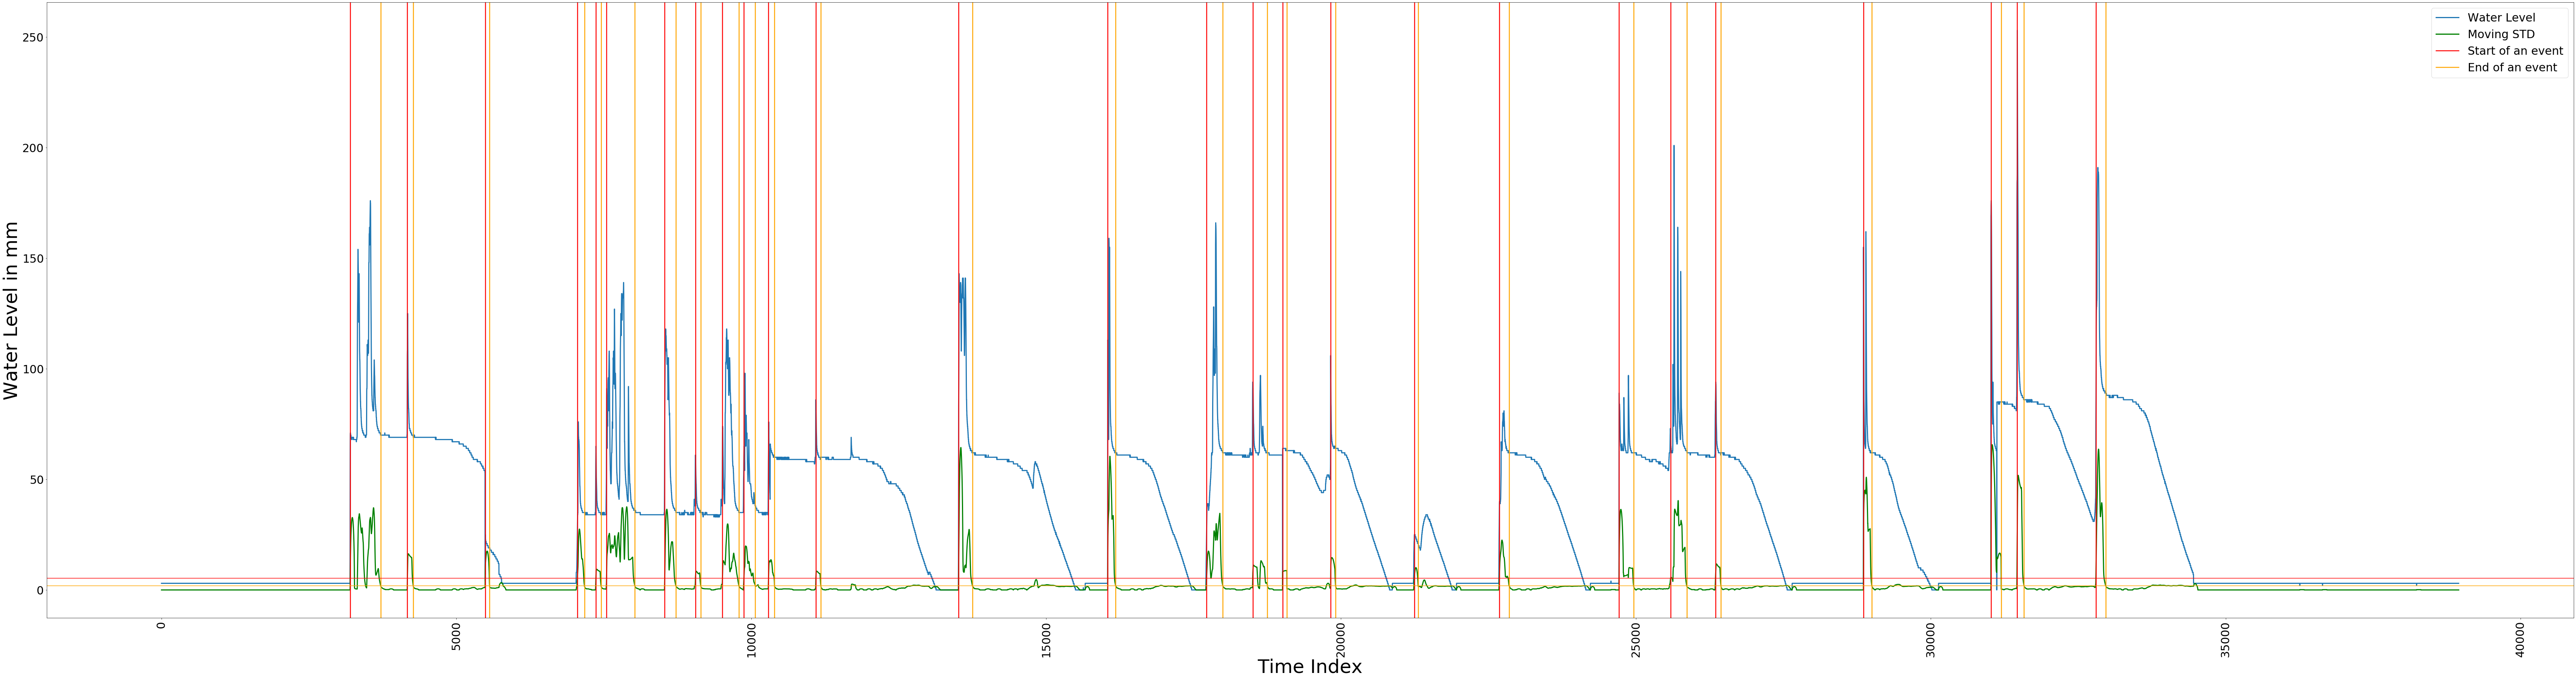

In [1252]:
plt.figure(figsize=(120, 30))
wle,=plt.plot(water_levelB,label='Water Level',linewidth=3)
mstd,=plt.plot(std_movB,label="Moving STD",linewidth=3,color="green")
for i in start_indexB:
    st=plt.axvline(x=i, linewidth=2.5,color='r',label="Start of an event")
for i in end_indexB:
    en=plt.axvline(x=i,linewidth=2.5, color='orange',label="End of an event")
plt.axhline(y=rng3pB, color='orange', linestyle='-')
plt.axhline(y=rng8pB, color='red', linestyle='-')
plt.xlabel('Time Index',fontsize=50)
plt.ylabel('Water Level in mm',fontsize=50)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',handles=[wle,mstd,st,en],fontsize=30)
plt.show()

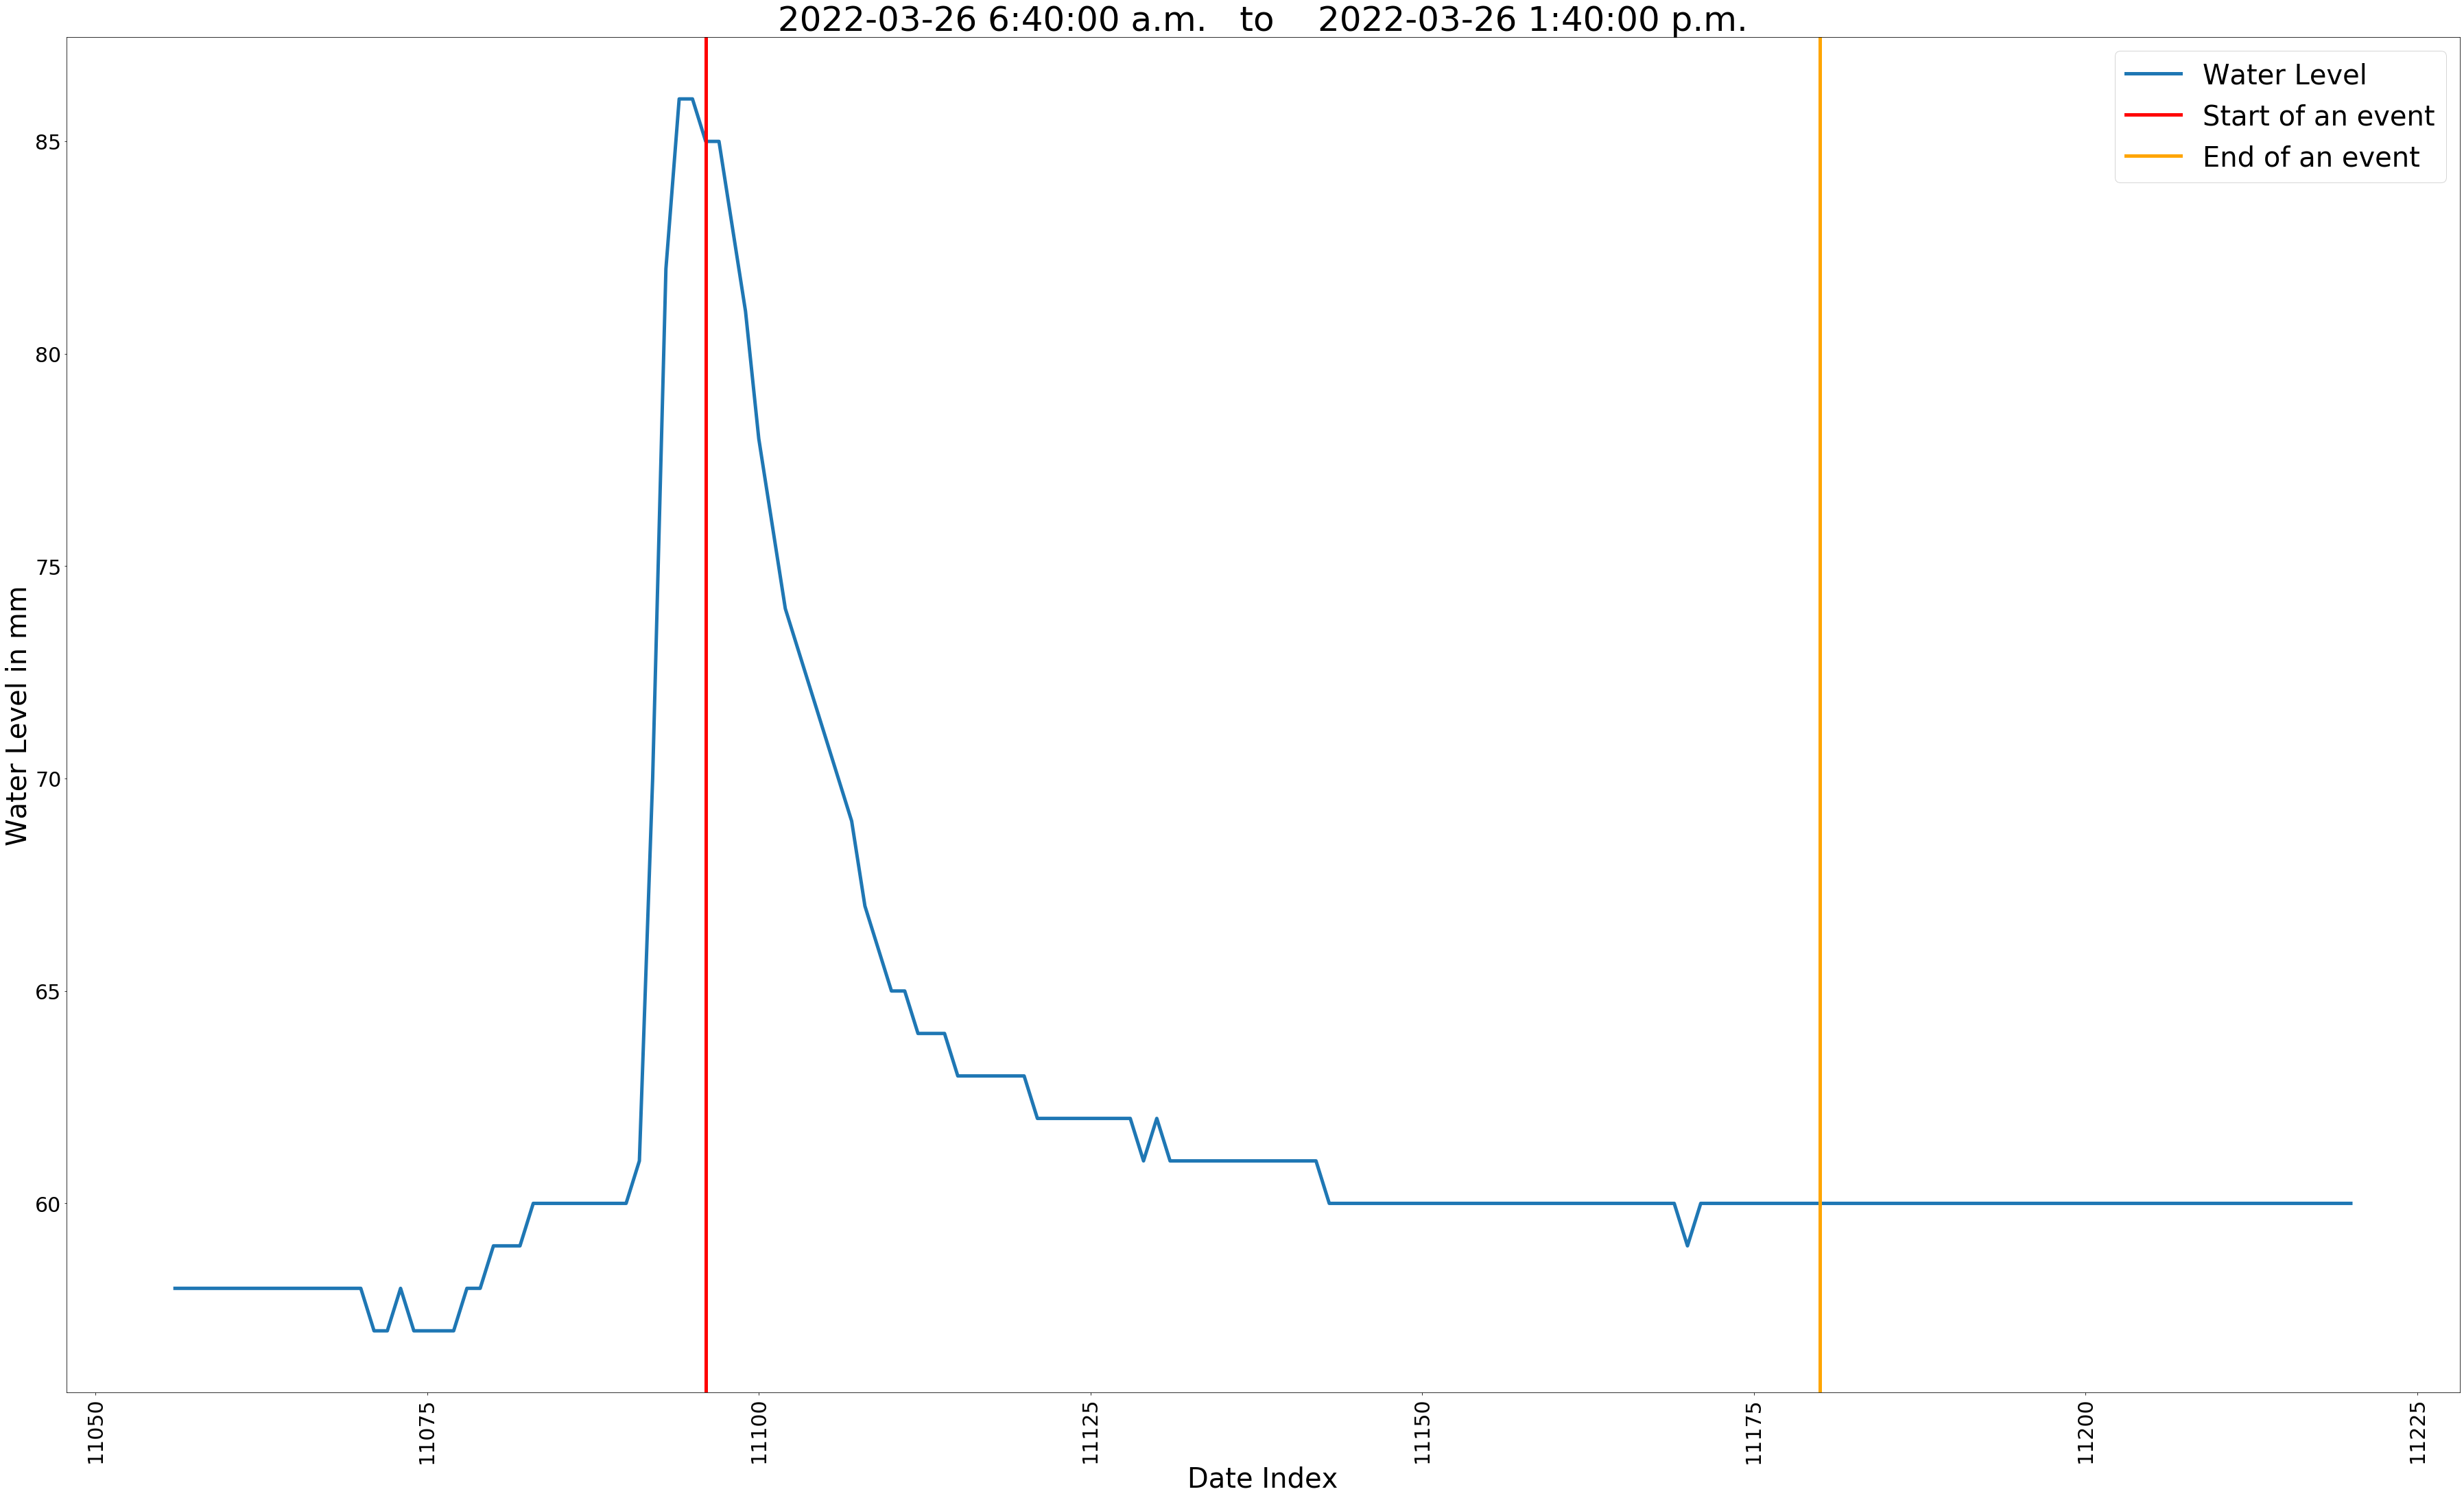

In [881]:
# Let's see a particular !Rainfall event
buffer=40
index=11
#X=Timestamp[rf_eventA["Rainfall_start_index"][index]-buffer:rf_eventA["Rainfall_end_index"][index]+buffer+1]
X=range(start_indexB[index]-buffer,end_indexB[index]+buffer+1)
Y=water_levelB[rf_eventB["Rainfall_start_index"][index]-buffer:rf_eventB["Rainfall_end_index"][index]+buffer+1]
plt.figure(figsize=(50, 30))
plt.plot(X,Y,linewidth=5,label="Water Level")
plt.axvline(x=start_indexB[index],linewidth=5,color='r',label="Start of an event")
plt.axvline(x=end_indexB[index],linewidth=5, color='orange',label="End of an event")
plt.title('Rainfall Event')
plt.xlabel('Date Index',fontsize=40)
plt.ylabel('Water Level in mm',fontsize=40)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',fontsize=40)
plt.tight_layout()
plt.title(start_timeB[index]+"   to    "+end_timeB[index],fontsize=50)
plt.show()

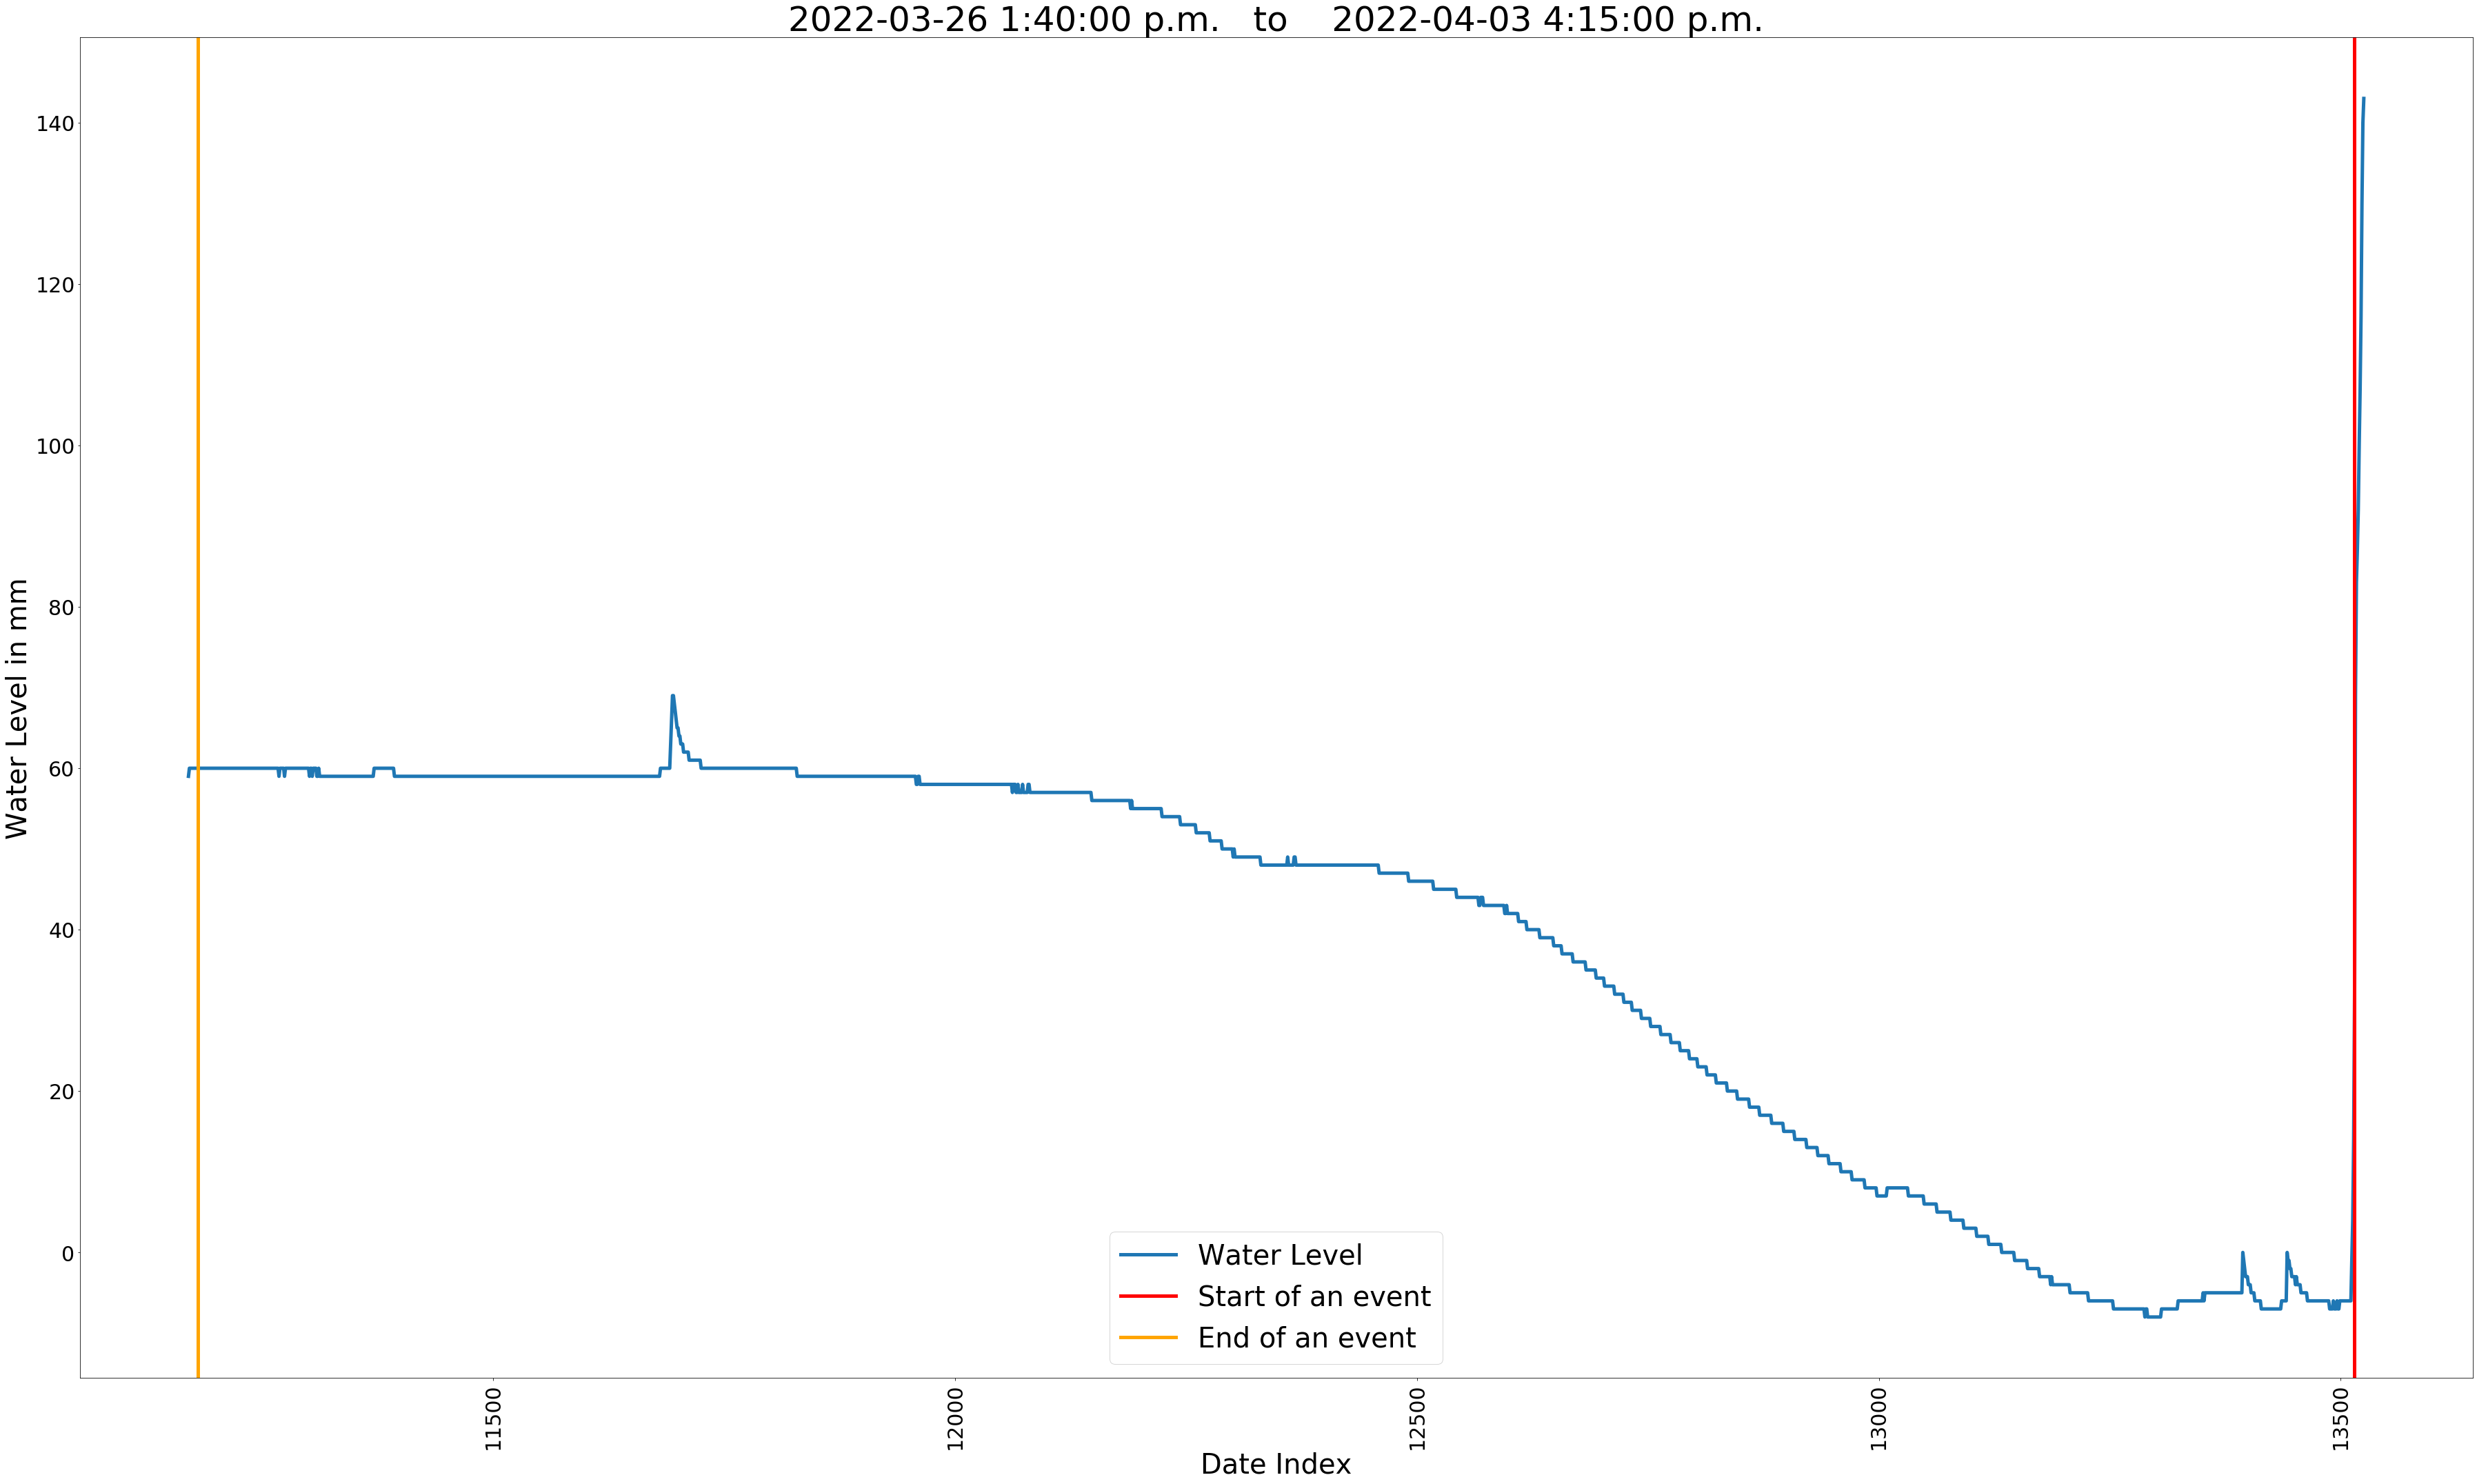

In [659]:
# Let's look at a particular No !Rainfall event
buffer=10
index=8
X=range(end_indexB[index-1]-buffer,start_indexB[index]+buffer+1)
Y=water_levelB[rf_eventB["Rainfall_end_index"][index-1]-buffer:rf_eventB["Rainfall_start_index"][index]+buffer+1]
plt.figure(figsize=(50, 30))
plt.plot(X,Y,linewidth=5,label="Water Level")
plt.axvline(x=start_indexB[index], linewidth=5,color='r',label="Start of an event")
plt.axvline(x=end_indexB[index-1],linewidth=5, color='orange',label="End of an event")
plt.title('No Rainfall Event')
plt.xlabel('Date Index',fontsize=40)
plt.ylabel('Water Level in mm',fontsize=40)
plt.tick_params(axis='x',labelsize=30,rotation=90)
plt.tick_params(axis='y',labelsize=30)
plt.legend(loc = 'best',fontsize=40)
plt.title(end_timeB[index-1]+"   to    "+start_timeB[index],fontsize=50)
plt.tight_layout()
plt.show()